In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from pylab import rcParams
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
pd.options.mode.chained_assignment = None
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
#Import da tabela de dados
test = pd.read_csv ('dbtcc.csv')

In [3]:
test.head()

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
0,606.4,vermelho,revestimento,i move line,NaN,24/08/2016,balneario,0.0,16001.51,0.0
1,606.4,bege,revestimento,i move line,NaN,24/08/2016,balneario,0.0,39731.56,0.0
2,610.0,branco,revestimento,Edificio ciaplan empresarial,NaN,16/09/2015,balneario,0.0,16500.00,15125.0
3,637.0,azul marinho,revestimento,Ryberg Arquitetura,jennifer ryberg,42228,balneario,0.0,5812.00,4810.0
4,641.0,NaN,revestimento,Paulo Carelli,Ed Number One,18/01/2016,balneario,2527.5,973087.50,0.0


In [4]:
#Exibe somente as linhas em que m2Aprox, 4mm e 3mm estão completos.
completos = test.loc[(test['m2Aprox']!= 0) & (test['4mm']!= 0) & (test['3mm']!= 0)]
completos

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
15,603.0,NaN,revestimento,Construtora Mestra,NaN,21/08/2015,blumenau,180.00,54000.00,45900.00
17,667.0,NaN,revestimento,tecnoponto,Juliano Marini,17/05/16,blumenau,405.63,113576.40,99784.98
23,719.2,NaN,brises acm,Colégio Paranaense,NaN,15/03/2016,curitiba,1708.00,527772.00,439810.00
31,599.0,NaN,revestimento,MVF Construções,NaN,42071,florianopolis,165.00,57750.00,40425.00
65,649.0,NaN,revestimento,i move line,NaN,42554,joinville,105.00,40405.44,30253.06
67,657.0,"preto fosco, grafite",revestimento,Bluforro,NaN,42678,joinville,181.00,45250.00,38372.00
68,660.0,"preto,grafite",revestimento,Diego Jardel,NaN,18/04/2016,joinville,202.50,50625.00,42930.00
84,719.0,NaN,NaN,GF esquadrias,NaN,42562,joinville,1677.50,503250.00,419375.00
91,741.0,NaN,revestimento,Rudinick,Assis Estruturas Metalicas,23/02/2017,joinville,217.50,65250.00,56500.00
92,742.0,NaN,revestimento,UNIMED,Walter,23/02/2017,joinville,55.00,16500.00,14300.00


In [5]:
#separa pela cidade de Joinville
joinvilleCompletos = completos.loc[(completos['cidade'] == 'joinville')]
joinvilleCompletos

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
65,649.0,NaN,revestimento,i move line,NaN,42554,joinville,105.00,40405.44,30253.06
67,657.0,"preto fosco, grafite",revestimento,Bluforro,NaN,42678,joinville,181.00,45250.00,38372.00
68,660.0,"preto,grafite",revestimento,Diego Jardel,NaN,18/04/2016,joinville,202.50,50625.00,42930.00
84,719.0,NaN,NaN,GF esquadrias,NaN,42562,joinville,1677.50,503250.00,419375.00
91,741.0,NaN,revestimento,Rudinick,Assis Estruturas Metalicas,23/02/2017,joinville,217.50,65250.00,56500.00
92,742.0,NaN,revestimento,UNIMED,Walter,23/02/2017,joinville,55.00,16500.00,14300.00
96,744.0,NaN,revestimento,Oceanica,NaN,28/02/2017,joinville,123.00,24780.00,20625.00
97,744.0,NaN,revestimento,Oceanica,NaN,28/02/2017,joinville,82.25,38932.00,34875.00
105,763.0,NaN,revestimento,Maryella campos,NaN,22/06/2017,joinville,150.00,45000.00,37500.00
108,768.0,NaN,revestimento,Costa Azul,NaN,42862,joinville,122.00,36300.00,30500.00


In [6]:
joinvilleCompletos['4mm'] / joinvilleCompletos['m2Aprox']

65     384.813714
67     250.000000
68     250.000000
84     300.000000
91     300.000000
92     300.000000
96     201.463415
97     473.337386
105    300.000000
108    297.540984
115    280.000000
137    300.000000
dtype: float64

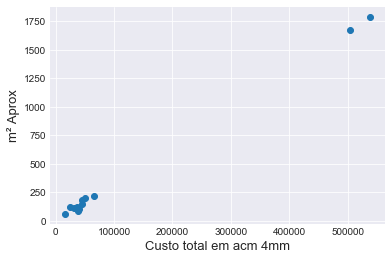

In [7]:
#Gráfico valor 4mm vs m² aproximado / Tabela Joinville, sem valores iguais a 0
fig, ax = plt.subplots()
ax.scatter(x = joinvilleCompletos['4mm'], y = joinvilleCompletos['m2Aprox'])
plt.ylabel('m² Aprox', fontsize=13)
plt.xlabel('Custo total em acm 4mm', fontsize=13)
plt.show()

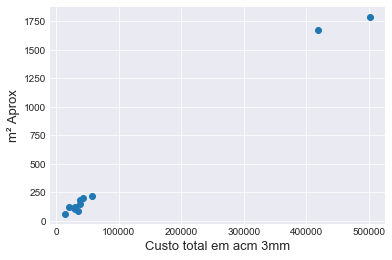

In [8]:
#Gráfico valor 3mm vs m² aproximado / Tabela Joinville, sem valores iguais a 0
fig, ax = plt.subplots()
ax.scatter(x = joinvilleCompletos['3mm'], y = joinvilleCompletos['m2Aprox'])
plt.ylabel('m² Aprox', fontsize=13)
plt.xlabel('Custo total em acm 3mm', fontsize=13)
plt.show()

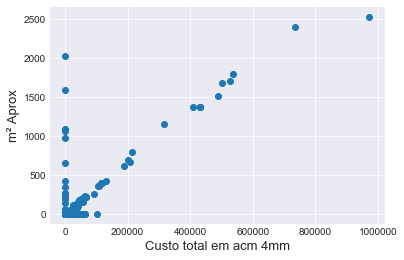

In [9]:
#Gráfico valor 4mm vs m² aproximado / Tabela Joinville, contendo celulas com valores iguais a 0
fig, ax = plt.subplots()
ax.scatter(x = test['4mm'], y = test['m2Aprox'])
plt.ylabel('m² Aprox', fontsize=13)
plt.xlabel('Custo total em acm 4mm', fontsize=13)
plt.show()

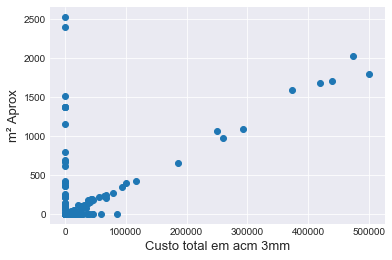

In [10]:
#Gráfico valor 3mm vs m² aproximado / Tabela Joinville, contendo celulas com valores iguais a 0
fig, ax = plt.subplots()
ax.scatter(x = test['3mm'], y = test['m2Aprox'])
plt.ylabel('m² Aprox', fontsize=13)
plt.xlabel('Custo total em acm 3mm', fontsize=13)
plt.show()

In [11]:
totalSem0 = test.loc[(test['m2Aprox']!= 0) & (test['4mm']!= 0) & (test['3mm']!= 0)]
totalSem0

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
15,603.0,NaN,revestimento,Construtora Mestra,NaN,21/08/2015,blumenau,180.00,54000.00,45900.00
17,667.0,NaN,revestimento,tecnoponto,Juliano Marini,17/05/16,blumenau,405.63,113576.40,99784.98
23,719.2,NaN,brises acm,Colégio Paranaense,NaN,15/03/2016,curitiba,1708.00,527772.00,439810.00
31,599.0,NaN,revestimento,MVF Construções,NaN,42071,florianopolis,165.00,57750.00,40425.00
65,649.0,NaN,revestimento,i move line,NaN,42554,joinville,105.00,40405.44,30253.06
67,657.0,"preto fosco, grafite",revestimento,Bluforro,NaN,42678,joinville,181.00,45250.00,38372.00
68,660.0,"preto,grafite",revestimento,Diego Jardel,NaN,18/04/2016,joinville,202.50,50625.00,42930.00
84,719.0,NaN,NaN,GF esquadrias,NaN,42562,joinville,1677.50,503250.00,419375.00
91,741.0,NaN,revestimento,Rudinick,Assis Estruturas Metalicas,23/02/2017,joinville,217.50,65250.00,56500.00
92,742.0,NaN,revestimento,UNIMED,Walter,23/02/2017,joinville,55.00,16500.00,14300.00


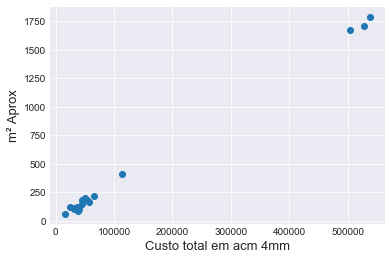

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = totalSem0['4mm'], y = totalSem0['m2Aprox'])
plt.ylabel('m² Aprox', fontsize=13)
plt.xlabel('Custo total em acm 4mm', fontsize=13)
plt.show()

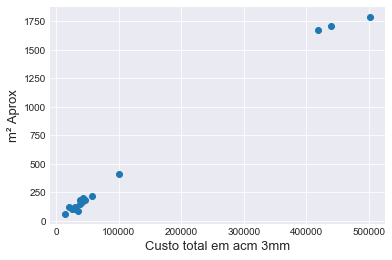

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = totalSem0['3mm'], y = totalSem0['m2Aprox'])
plt.ylabel('m² Aprox', fontsize=13)
plt.xlabel('Custo total em acm 3mm', fontsize=13)
plt.show()

In [14]:
joinvilleCompletos

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
65,649.0,NaN,revestimento,i move line,NaN,42554,joinville,105.00,40405.44,30253.06
67,657.0,"preto fosco, grafite",revestimento,Bluforro,NaN,42678,joinville,181.00,45250.00,38372.00
68,660.0,"preto,grafite",revestimento,Diego Jardel,NaN,18/04/2016,joinville,202.50,50625.00,42930.00
84,719.0,NaN,NaN,GF esquadrias,NaN,42562,joinville,1677.50,503250.00,419375.00
91,741.0,NaN,revestimento,Rudinick,Assis Estruturas Metalicas,23/02/2017,joinville,217.50,65250.00,56500.00
92,742.0,NaN,revestimento,UNIMED,Walter,23/02/2017,joinville,55.00,16500.00,14300.00
96,744.0,NaN,revestimento,Oceanica,NaN,28/02/2017,joinville,123.00,24780.00,20625.00
97,744.0,NaN,revestimento,Oceanica,NaN,28/02/2017,joinville,82.25,38932.00,34875.00
105,763.0,NaN,revestimento,Maryella campos,NaN,22/06/2017,joinville,150.00,45000.00,37500.00
108,768.0,NaN,revestimento,Costa Azul,NaN,42862,joinville,122.00,36300.00,30500.00


In [15]:
JLLEMean3mm = (joinvilleCompletos['3mm'].mean()) / (joinvilleCompletos['m2Aprox'].mean())
JLLEMean3mm

260.33415866756604

In [16]:
JLLEMean4mm = (joinvilleCompletos['4mm'].mean()) / (joinvilleCompletos['m2Aprox'].mean())
JLLEMean4mm

297.78289627976966

In [17]:
#data=data.replace({'artist_hotness': {0: mean_artist_hotness}})
jlleMeanTest = test.loc[(test['cidade'] == 'joinville')]
jlleMeanTest

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
46,602.0,NaN,revestimento,grupo estrutura,NaN,20/8/2015,joinville,0.00,18054.00,15045.00
47,608.0,"cinza,prata",revestimento,C.E equipamentos industriais,NaN,42013,joinville,0.00,45000.00,38160.00
48,614.0,NaN,revestimento,NaN,NaN,25/10/2015,joinville,0.00,5000.00,4580.00
49,615.0,NaN,revestimento,NaN,NaN,28/10/2015,joinville,0.00,35898.50,0.00
50,616.0,"branco,madeira",revestimento,NaN,NaN,30/09/2015,joinville,0.00,4375.00,3750.00
51,618.0,mogno,revestimento,Exata adm de condominios,NaN,42045,joinville,0.00,42217.69,0.00
52,619.0,"amarelo,azul",revestimento,lojas presidente,NaN,42226,joinville,0.00,102480.00,86259.86
53,620.2,prata,revestimento,topcar,NaN,42862,joinville,61.80,17922.00,0.00
54,620.2,branco,revestimento,topcar,NaN,42862,joinville,358.57,103985.30,0.00
55,620.2,preto,revestimento,topcar,NaN,42862,joinville,15.00,4350.00,0.00


In [18]:
jlleXmmSem0 = jlleMeanTest[(jlleMeanTest['4mm']!= 0) & (jlleMeanTest['3mm']!= 0)].copy()
jlleXmmSem0['$4mm'] = (joinvilleCompletos['4mm'].mean()) / (joinvilleCompletos['m2Aprox'].mean())
jlleXmmSem0['$3mm'] = (joinvilleCompletos['3mm'].mean()) / (joinvilleCompletos['m2Aprox'].mean())
jlleXmmSem0

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
46,602.0,NaN,revestimento,grupo estrutura,NaN,20/8/2015,joinville,0.00,18054.00,15045.00,297.782896,260.334159
47,608.0,"cinza,prata",revestimento,C.E equipamentos industriais,NaN,42013,joinville,0.00,45000.00,38160.00,297.782896,260.334159
48,614.0,NaN,revestimento,NaN,NaN,25/10/2015,joinville,0.00,5000.00,4580.00,297.782896,260.334159
50,616.0,"branco,madeira",revestimento,NaN,NaN,30/09/2015,joinville,0.00,4375.00,3750.00,297.782896,260.334159
52,619.0,"amarelo,azul",revestimento,lojas presidente,NaN,42226,joinville,0.00,102480.00,86259.86,297.782896,260.334159
63,645.0,NaN,revestimento,Raphael Canto,NaN,42462,joinville,0.00,8780.00,7317.00,297.782896,260.334159
65,649.0,NaN,revestimento,i move line,NaN,42554,joinville,105.00,40405.44,30253.06,297.782896,260.334159
67,657.0,"preto fosco, grafite",revestimento,Bluforro,NaN,42678,joinville,181.00,45250.00,38372.00,297.782896,260.334159
68,660.0,"preto,grafite",revestimento,Diego Jardel,NaN,18/04/2016,joinville,202.50,50625.00,42930.00,297.782896,260.334159
71,666.0,amarelo,revestimento,Dacoregio,NaN,16/05/16,joinville,0.00,2272.00,2047.62,297.782896,260.334159


In [19]:
#data=data.replace({'artist_hotness': {0: mean_artist_hotness}})
m2Aprox4mm = ((jlleXmmSem0['4mm']) / (jlleXmmSem0['$4mm']))
m2Aprox4mm



46       60.628062
47      151.116805
48       16.790756
50       14.691912
52      344.143338
63       29.484568
65      135.687578
67      151.956343
68      170.006406
71        7.629720
72      211.923790
75       14.356097
78       91.056271
79       32.691602
80      141.948247
81      177.143048
84     1689.989607
85       90.670083
86      105.731392
91      219.119368
92       55.409495
96       83.214988
97      130.739544
105     151.116805
108     121.900890
110      28.544285
115     105.781764
119      45.402205
135      98.326668
136      28.124517
137    1803.327212
dtype: float64

In [20]:
jlleXmmSem0.loc[ jlleXmmSem0.m2Aprox == 0, "m2Aprox" ] = ((jlleXmmSem0['4mm']) / (jlleXmmSem0['$4mm']))
jlleXmmSem0

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
46,602.0,NaN,revestimento,grupo estrutura,NaN,20/8/2015,joinville,60.628062,18054.00,15045.00,297.782896,260.334159
47,608.0,"cinza,prata",revestimento,C.E equipamentos industriais,NaN,42013,joinville,151.116805,45000.00,38160.00,297.782896,260.334159
48,614.0,NaN,revestimento,NaN,NaN,25/10/2015,joinville,16.790756,5000.00,4580.00,297.782896,260.334159
50,616.0,"branco,madeira",revestimento,NaN,NaN,30/09/2015,joinville,14.691912,4375.00,3750.00,297.782896,260.334159
52,619.0,"amarelo,azul",revestimento,lojas presidente,NaN,42226,joinville,344.143338,102480.00,86259.86,297.782896,260.334159
63,645.0,NaN,revestimento,Raphael Canto,NaN,42462,joinville,29.484568,8780.00,7317.00,297.782896,260.334159
65,649.0,NaN,revestimento,i move line,NaN,42554,joinville,105.000000,40405.44,30253.06,297.782896,260.334159
67,657.0,"preto fosco, grafite",revestimento,Bluforro,NaN,42678,joinville,181.000000,45250.00,38372.00,297.782896,260.334159
68,660.0,"preto,grafite",revestimento,Diego Jardel,NaN,18/04/2016,joinville,202.500000,50625.00,42930.00,297.782896,260.334159
71,666.0,amarelo,revestimento,Dacoregio,NaN,16/05/16,joinville,7.629720,2272.00,2047.62,297.782896,260.334159


In [21]:
joinville = jlleMeanTest.copy()
joinville
joinville['$4mm'] = (jlleXmmSem0['4mm'].mean()) / (jlleXmmSem0['m2Aprox'].mean())
joinville['$3mm'] = (jlleXmmSem0['3mm'].mean()) / (jlleXmmSem0['m2Aprox'].mean())
joinville

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
46,602.0,NaN,revestimento,grupo estrutura,NaN,20/8/2015,joinville,0.00,18054.00,15045.00,297.782896,256.508935
47,608.0,"cinza,prata",revestimento,C.E equipamentos industriais,NaN,42013,joinville,0.00,45000.00,38160.00,297.782896,256.508935
48,614.0,NaN,revestimento,NaN,NaN,25/10/2015,joinville,0.00,5000.00,4580.00,297.782896,256.508935
49,615.0,NaN,revestimento,NaN,NaN,28/10/2015,joinville,0.00,35898.50,0.00,297.782896,256.508935
50,616.0,"branco,madeira",revestimento,NaN,NaN,30/09/2015,joinville,0.00,4375.00,3750.00,297.782896,256.508935
51,618.0,mogno,revestimento,Exata adm de condominios,NaN,42045,joinville,0.00,42217.69,0.00,297.782896,256.508935
52,619.0,"amarelo,azul",revestimento,lojas presidente,NaN,42226,joinville,0.00,102480.00,86259.86,297.782896,256.508935
53,620.2,prata,revestimento,topcar,NaN,42862,joinville,61.80,17922.00,0.00,297.782896,256.508935
54,620.2,branco,revestimento,topcar,NaN,42862,joinville,358.57,103985.30,0.00,297.782896,256.508935
55,620.2,preto,revestimento,topcar,NaN,42862,joinville,15.00,4350.00,0.00,297.782896,256.508935


In [22]:
joinville.loc[ joinville.m2Aprox == 0, "m2Aprox" ] = ((joinville['3mm']) / (joinville['$3mm']))

In [23]:
joinville.loc[ joinville.m2Aprox == 0, "m2Aprox" ] = ((joinville['4mm']) / (joinville['$4mm']))

In [24]:
joinville.loc[ joinville['3mm'] == 0, "3mm" ] = ((joinville['m2Aprox']) * (joinville['$3mm']))

In [25]:
joinville.loc[ joinville['4mm'] == 0, "4mm" ] = ((joinville['m2Aprox']) * (joinville['$4mm']))

In [26]:
joinville

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
46,602.0,NaN,revestimento,grupo estrutura,NaN,20/8/2015,joinville,58.652928,18054.000000,15045.000000,297.782896,256.508935
47,608.0,"cinza,prata",revestimento,C.E equipamentos industriais,NaN,42013,joinville,148.766748,45000.000000,38160.000000,297.782896,256.508935
48,614.0,NaN,revestimento,NaN,NaN,25/10/2015,joinville,17.855129,5000.000000,4580.000000,297.782896,256.508935
49,615.0,NaN,revestimento,NaN,NaN,28/10/2015,joinville,120.552592,35898.500000,30922.816930,297.782896,256.508935
50,616.0,"branco,madeira",revestimento,NaN,NaN,30/09/2015,joinville,14.619374,4375.000000,3750.000000,297.782896,256.508935
51,618.0,mogno,revestimento,Exata adm de condominios,NaN,42045,joinville,141.773388,42217.690000,36366.140620,297.782896,256.508935
52,619.0,"amarelo,azul",revestimento,lojas presidente,NaN,42226,joinville,336.284037,102480.000000,86259.860000,297.782896,256.508935
53,620.2,prata,revestimento,topcar,NaN,42862,joinville,61.800000,17922.000000,15852.252154,297.782896,256.508935
54,620.2,branco,revestimento,topcar,NaN,42862,joinville,358.570000,103985.300000,91976.408657,297.782896,256.508935
55,620.2,preto,revestimento,topcar,NaN,42862,joinville,15.000000,4350.000000,3847.634018,297.782896,256.508935


In [27]:
jllett4 = joinville['4mm']/joinville['$4mm']
jllett3 = joinville['3mm']/joinville['$3mm']

In [28]:
jllenewm2Aprox =  (jllett4+jllett3)/2

In [29]:
jllenewm2Aprox

46       59.640495
47      149.941777
48       17.322942
49      120.552592
50       14.655643
51      141.773388
52      340.213688
53       60.992393
54      353.884182
55       14.803979
56       97.262142
57      682.433821
58      226.807823
59       12.593067
60       21.970506
61        6.409734
62      680.647022
63       29.004945
64       77.427214
65      126.814561
66        4.346827
67      150.774787
68      168.684499
69      755.622518
70       32.943464
71        7.806183
72      196.784813
73      225.636860
74      179.728254
75       14.121276
          ...     
111     220.483176
112     209.611161
113      32.649935
114     116.954990
115     107.713534
116    1409.605082
117     135.565888
118      63.350620
119      46.142781
120       9.730655
121      30.607121
122    1409.605082
123    1409.605082
124      51.850046
125      20.662048
126    1373.370630
127       6.682721
128      57.015558
129      13.254899
130      11.311885
131      70.601829
132      25.

In [30]:
jllenewvalor3mmm2 = joinville['3mm'] / joinville['m2Aprox']

In [31]:
jllenewvalor3mmm2.mean()


259.0144936807729

In [32]:
jllenewvalor4mmm2 = joinville['4mm'] / joinville['m2Aprox']

In [33]:
jllenewvalor4mmm2.mean()

298.92346099870934

In [34]:
##Valor por m2 em Joinville 3mm
    #jllenewvalor3mmm2.mean()
#Valor por m2 em Joinville 4mm
    #jllenewvalor4mmm2.mean()

In [35]:
################################################################################################################################

In [36]:
 balnearioteste = test.loc[(test['cidade'] == 'balneario')]

In [37]:
balneario4mmSem0 = balnearioteste.loc[(balnearioteste['m2Aprox']!= 0) & (balnearioteste['4mm']!= 0)]

In [38]:
balneario4mmSem0

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
4,641.0,NaN,revestimento,Paulo Carelli,Ed Number One,18/01/2016,balneario,2527.50,973087.5,0.0
7,712.0,NaN,revestimento,Edificio Dona Rosinha,"Karine, Miriam, Luiz",22/01/2018,balneario,90.00,27450.0,0.0
8,712.3,NaN,revestimento,Edificio Dona Rosinha,"Karine, Miriam, Luiz",22/01/2018,balneario,432.00,131760.0,0.0
9,712.4,NaN,revestimento,Edificio Dona Rosinha,"Karine, Miriam, Luiz",22/01/2018,balneario,396.04,118812.0,0.0


In [39]:
(balneario4mmSem0['4mm'] / balneario4mmSem0['m2Aprox']).mean()

323.75

In [40]:
balneario3mmSem0 = balnearioteste.loc[(balnearioteste['m2Aprox']!= 0) & (balnearioteste['3mm']!= 0)]
balneario3mmSem0

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
11,722.0,NaN,revestimento,Torre Atlantica,Juliano Marini,28/11/2016,balneario,2020.0,0.0,474700.0
12,722.0,NaN,revestimento,Torre Atlantica,Juliano Marini,28/11/2016,balneario,191.0,0.0,44885.0
13,722.0,NaN,revestimento,Torre Atlantica,Juliano Marini,28/11/2016,balneario,1591.0,0.0,373885.0
14,722.0,NaN,revestimento,Torre Atlantica,Juliano Marini,28/11/2016,balneario,1063.0,0.0,249805.0


In [41]:
(balneario3mmSem0['3mm'] / balneario3mmSem0['m2Aprox']).mean()

235.0

In [42]:
balnearioteste

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
0,606.4,vermelho,revestimento,i move line,NaN,24/08/2016,balneario,0.00,16001.51,0.0
1,606.4,bege,revestimento,i move line,NaN,24/08/2016,balneario,0.00,39731.56,0.0
2,610.0,branco,revestimento,Edificio ciaplan empresarial,NaN,16/09/2015,balneario,0.00,16500.00,15125.0
3,637.0,azul marinho,revestimento,Ryberg Arquitetura,jennifer ryberg,42228,balneario,0.00,5812.00,4810.0
4,641.0,NaN,revestimento,Paulo Carelli,Ed Number One,18/01/2016,balneario,2527.50,973087.50,0.0
5,654.5,NaN,revestimento,Construtora Arrka,Sunplace,42678,balneario,0.00,39956.50,0.0
6,655.0,NaN,revestimento,Arq. Analu,NaN,42373,balneario,0.00,15983.67,0.0
7,712.0,NaN,revestimento,Edificio Dona Rosinha,"Karine, Miriam, Luiz",22/01/2018,balneario,90.00,27450.00,0.0
8,712.3,NaN,revestimento,Edificio Dona Rosinha,"Karine, Miriam, Luiz",22/01/2018,balneario,432.00,131760.00,0.0
9,712.4,NaN,revestimento,Edificio Dona Rosinha,"Karine, Miriam, Luiz",22/01/2018,balneario,396.04,118812.00,0.0


In [43]:
balneario = balnearioteste.copy()
balneario['$4mm'] = (balneario4mmSem0['4mm'] / balneario4mmSem0['m2Aprox']).mean()
balneario['$3mm'] = (balneario3mmSem0['3mm'] / balneario3mmSem0['m2Aprox']).mean()
balneario

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
0,606.4,vermelho,revestimento,i move line,NaN,24/08/2016,balneario,0.00,16001.51,0.0,323.75,235.0
1,606.4,bege,revestimento,i move line,NaN,24/08/2016,balneario,0.00,39731.56,0.0,323.75,235.0
2,610.0,branco,revestimento,Edificio ciaplan empresarial,NaN,16/09/2015,balneario,0.00,16500.00,15125.0,323.75,235.0
3,637.0,azul marinho,revestimento,Ryberg Arquitetura,jennifer ryberg,42228,balneario,0.00,5812.00,4810.0,323.75,235.0
4,641.0,NaN,revestimento,Paulo Carelli,Ed Number One,18/01/2016,balneario,2527.50,973087.50,0.0,323.75,235.0
5,654.5,NaN,revestimento,Construtora Arrka,Sunplace,42678,balneario,0.00,39956.50,0.0,323.75,235.0
6,655.0,NaN,revestimento,Arq. Analu,NaN,42373,balneario,0.00,15983.67,0.0,323.75,235.0
7,712.0,NaN,revestimento,Edificio Dona Rosinha,"Karine, Miriam, Luiz",22/01/2018,balneario,90.00,27450.00,0.0,323.75,235.0
8,712.3,NaN,revestimento,Edificio Dona Rosinha,"Karine, Miriam, Luiz",22/01/2018,balneario,432.00,131760.00,0.0,323.75,235.0
9,712.4,NaN,revestimento,Edificio Dona Rosinha,"Karine, Miriam, Luiz",22/01/2018,balneario,396.04,118812.00,0.0,323.75,235.0


In [44]:
balneario.loc[ balneario.m2Aprox == 0, "m2Aprox" ] = ((balneario['4mm']) / (balneario['$4mm']))

In [45]:
balneario.loc[ balneario['3mm'] == 0, "3mm" ] = ((balneario['$3mm']) * (balneario['m2Aprox']))

In [46]:
balneario.loc[ balneario['4mm'] == 0, "4mm" ] = ((balneario['$4mm']) * (balneario['m2Aprox']))

In [47]:
Balnearionewvalor3mmm2 = (balneario['3mm']/balneario['m2Aprox']).mean()
Balnearionewvalor3mmm2

241.31371396344727

In [48]:
Balnearionewvalor4mm2 = (balneario['4mm']/balneario['m2Aprox']).mean()
Balnearionewvalor4mm2

323.75

In [49]:
##Valor por m2 em Balneario 3mm
    #jllenewvalor3mmm2.mean()
#Valor por m2 em Balneario 4mm
    #jllenewvalor4mmm2.mean()

In [50]:
################################################################################################################################

In [51]:
 blumenauteste = test.loc[(test['cidade'] == 'blumenau')]

In [52]:
blumenauteste

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
15,603.0,NaN,revestimento,Construtora Mestra,NaN,21/08/2015,blumenau,180.00,54000.00,45900.00
16,647.0,NaN,revestimento,Araruama Engenharia,NaN,26/02/2016,blumenau,0.00,0.00,3050.00
17,667.0,NaN,revestimento,tecnoponto,Juliano Marini,17/05/16,blumenau,405.63,113576.40,99784.98
18,731.0,NaN,revestimento,Construtora Richter,Habibs,43070,blumenau,240.00,0.00,63600.00
19,796.0,NaN,revestimento,Construtora Focus,Eng Renerio Neto,42805,blumenau,0.00,19046.26,15561.90
20,796.5,NaN,revestimento,Copapel,Jonathan,42928,blumenau,0.00,0.00,15561.90


In [53]:
blumenau4mmSem0 = balnearioteste.loc[(balnearioteste['m2Aprox']!= 0) & (balnearioteste['4mm']!= 0)]

In [54]:
blumenau4mmSem0

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
4,641.0,NaN,revestimento,Paulo Carelli,Ed Number One,18/01/2016,balneario,2527.50,973087.5,0.0
7,712.0,NaN,revestimento,Edificio Dona Rosinha,"Karine, Miriam, Luiz",22/01/2018,balneario,90.00,27450.0,0.0
8,712.3,NaN,revestimento,Edificio Dona Rosinha,"Karine, Miriam, Luiz",22/01/2018,balneario,432.00,131760.0,0.0
9,712.4,NaN,revestimento,Edificio Dona Rosinha,"Karine, Miriam, Luiz",22/01/2018,balneario,396.04,118812.0,0.0


In [55]:
(blumenau4mmSem0['4mm'] / blumenau4mmSem0['m2Aprox']).mean()

323.75

In [56]:
blumenau3mmSem0 = blumenauteste.loc[(blumenauteste['m2Aprox']!= 0) & (blumenauteste['3mm']!= 0)]
blumenau3mmSem0

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
15,603.0,NaN,revestimento,Construtora Mestra,NaN,21/08/2015,blumenau,180.00,54000.0,45900.00
17,667.0,NaN,revestimento,tecnoponto,Juliano Marini,17/05/16,blumenau,405.63,113576.4,99784.98
18,731.0,NaN,revestimento,Construtora Richter,Habibs,43070,blumenau,240.00,0.0,63600.00


In [57]:
(blumenau3mmSem0['3mm'] / blumenau3mmSem0['m2Aprox']).mean()

255.33333333333334

In [58]:
blumenauteste

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
15,603.0,NaN,revestimento,Construtora Mestra,NaN,21/08/2015,blumenau,180.00,54000.00,45900.00
16,647.0,NaN,revestimento,Araruama Engenharia,NaN,26/02/2016,blumenau,0.00,0.00,3050.00
17,667.0,NaN,revestimento,tecnoponto,Juliano Marini,17/05/16,blumenau,405.63,113576.40,99784.98
18,731.0,NaN,revestimento,Construtora Richter,Habibs,43070,blumenau,240.00,0.00,63600.00
19,796.0,NaN,revestimento,Construtora Focus,Eng Renerio Neto,42805,blumenau,0.00,19046.26,15561.90
20,796.5,NaN,revestimento,Copapel,Jonathan,42928,blumenau,0.00,0.00,15561.90


In [59]:
blumenau = blumenauteste.copy()
blumenau['$4mm'] = (blumenau4mmSem0['4mm'] / blumenau4mmSem0['m2Aprox']).mean()
blumenau['$3mm'] = (blumenau3mmSem0['3mm'] / blumenau3mmSem0['m2Aprox']).mean()
blumenau

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
15,603.0,NaN,revestimento,Construtora Mestra,NaN,21/08/2015,blumenau,180.00,54000.00,45900.00,323.75,255.333333
16,647.0,NaN,revestimento,Araruama Engenharia,NaN,26/02/2016,blumenau,0.00,0.00,3050.00,323.75,255.333333
17,667.0,NaN,revestimento,tecnoponto,Juliano Marini,17/05/16,blumenau,405.63,113576.40,99784.98,323.75,255.333333
18,731.0,NaN,revestimento,Construtora Richter,Habibs,43070,blumenau,240.00,0.00,63600.00,323.75,255.333333
19,796.0,NaN,revestimento,Construtora Focus,Eng Renerio Neto,42805,blumenau,0.00,19046.26,15561.90,323.75,255.333333
20,796.5,NaN,revestimento,Copapel,Jonathan,42928,blumenau,0.00,0.00,15561.90,323.75,255.333333


In [60]:
blumenau.loc[ blumenau['m2Aprox'] == 0, "m2Aprox" ] = ((blumenau['3mm']) / (blumenau['$3mm']))

In [61]:
blumenau

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
15,603.0,NaN,revestimento,Construtora Mestra,NaN,21/08/2015,blumenau,180.000000,54000.00,45900.00,323.75,255.333333
16,647.0,NaN,revestimento,Araruama Engenharia,NaN,26/02/2016,blumenau,11.945170,0.00,3050.00,323.75,255.333333
17,667.0,NaN,revestimento,tecnoponto,Juliano Marini,17/05/16,blumenau,405.630000,113576.40,99784.98,323.75,255.333333
18,731.0,NaN,revestimento,Construtora Richter,Habibs,43070,blumenau,240.000000,0.00,63600.00,323.75,255.333333
19,796.0,NaN,revestimento,Construtora Focus,Eng Renerio Neto,42805,blumenau,60.947389,19046.26,15561.90,323.75,255.333333
20,796.5,NaN,revestimento,Copapel,Jonathan,42928,blumenau,60.947389,0.00,15561.90,323.75,255.333333


In [62]:
blumenau.loc[ blumenau['4mm'] == 0, "4mm" ] = ((blumenau['m2Aprox']) * (blumenau['$4mm']))

In [63]:
blumenau

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
15,603.0,NaN,revestimento,Construtora Mestra,NaN,21/08/2015,blumenau,180.000000,54000.000000,45900.00,323.75,255.333333
16,647.0,NaN,revestimento,Araruama Engenharia,NaN,26/02/2016,blumenau,11.945170,3867.248695,3050.00,323.75,255.333333
17,667.0,NaN,revestimento,tecnoponto,Juliano Marini,17/05/16,blumenau,405.630000,113576.400000,99784.98,323.75,255.333333
18,731.0,NaN,revestimento,Construtora Richter,Habibs,43070,blumenau,240.000000,77700.000000,63600.00,323.75,255.333333
19,796.0,NaN,revestimento,Construtora Focus,Eng Renerio Neto,42805,blumenau,60.947389,19046.260000,15561.90,323.75,255.333333
20,796.5,NaN,revestimento,Copapel,Jonathan,42928,blumenau,60.947389,19731.717200,15561.90,323.75,255.333333


In [64]:
Blumenaunewvalor4mm2 = (blumenau['4mm']/blumenau['m2Aprox']).mean()
Blumenaunewvalor4mm2

310.6255494544725

In [65]:
Blumenaunewvalor3mm2 = (blumenau['3mm']/blumenau['m2Aprox']).mean()
Blumenaunewvalor3mm2

255.33333333333334

In [66]:
##Valor por m2 em Blumenau 3mm
    #Blumenaunewvalor3mm2
#Valor por m2 em Blumenau 4mm
    #Blumenaunewvalor4mm2

In [67]:
################################################################################################################################

In [68]:
 curitibateste = test.loc[(test['cidade'] == 'curitiba')]

In [69]:
curitibateste

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
22,634.0,branco porcelana,revestimento,construtora richter,NaN,42159,curitiba,1160.65,316439.0,0.0
23,719.2,NaN,brises acm,Colégio Paranaense,NaN,15/03/2016,curitiba,1708.00,527772.0,439810.0
24,719.3,madeira,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,662.00,0.0,186600.0
25,719.3,branca,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,1086.00,0.0,293220.0
26,719.3,cinza,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,346.00,0.0,93420.0
27,719.3,preto fosco,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,208.00,0.0,66690.0
28,719.3,cinza,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,247.00,0.0,66690.0
29,719.3,branca,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,432.10,0.0,116640.0
30,830.0,NaN,revestimento,Copapel,jonathan,19/03/2018,curitiba,0.00,0.0,13670.0


In [70]:
curitiba4mmSem0 = curitibateste.loc[(curitibateste['m2Aprox']!= 0) & (curitibateste['4mm']!= 0)]
curitiba4mmSem0

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
22,634.0,branco porcelana,revestimento,construtora richter,NaN,42159,curitiba,1160.65,316439.0,0.0
23,719.2,NaN,brises acm,Colégio Paranaense,NaN,15/03/2016,curitiba,1708.00,527772.0,439810.0


In [71]:
(curitiba4mmSem0['4mm'] / curitiba4mmSem0['m2Aprox']).mean()

290.8197346314565

In [72]:
curitiba3mmSem0 = curitibateste.loc[(curitibateste['m2Aprox']!= 0) & (curitibateste['3mm']!= 0)]
curitiba3mmSem0

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
23,719.2,NaN,brises acm,Colégio Paranaense,NaN,15/03/2016,curitiba,1708.0,527772.0,439810.0
24,719.3,madeira,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,662.0,0.0,186600.0
25,719.3,branca,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,1086.0,0.0,293220.0
26,719.3,cinza,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,346.0,0.0,93420.0
27,719.3,preto fosco,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,208.0,0.0,66690.0
28,719.3,cinza,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,247.0,0.0,66690.0
29,719.3,branca,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,432.1,0.0,116640.0


In [73]:
(curitiba3mmSem0['3mm'] / curitiba3mmSem0['m2Aprox']).mean()

277.13366089238883

In [74]:
curitibateste

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
22,634.0,branco porcelana,revestimento,construtora richter,NaN,42159,curitiba,1160.65,316439.0,0.0
23,719.2,NaN,brises acm,Colégio Paranaense,NaN,15/03/2016,curitiba,1708.00,527772.0,439810.0
24,719.3,madeira,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,662.00,0.0,186600.0
25,719.3,branca,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,1086.00,0.0,293220.0
26,719.3,cinza,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,346.00,0.0,93420.0
27,719.3,preto fosco,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,208.00,0.0,66690.0
28,719.3,cinza,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,247.00,0.0,66690.0
29,719.3,branca,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,432.10,0.0,116640.0
30,830.0,NaN,revestimento,Copapel,jonathan,19/03/2018,curitiba,0.00,0.0,13670.0


In [75]:
curitiba = curitibateste.copy()
curitiba['$4mm'] = (curitiba4mmSem0['4mm'] / curitiba4mmSem0['m2Aprox']).mean()
curitiba['$3mm'] = (curitiba3mmSem0['3mm'] / curitiba3mmSem0['m2Aprox']).mean()
curitiba

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
22,634.0,branco porcelana,revestimento,construtora richter,NaN,42159,curitiba,1160.65,316439.0,0.0,290.819735,277.133661
23,719.2,NaN,brises acm,Colégio Paranaense,NaN,15/03/2016,curitiba,1708.00,527772.0,439810.0,290.819735,277.133661
24,719.3,madeira,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,662.00,0.0,186600.0,290.819735,277.133661
25,719.3,branca,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,1086.00,0.0,293220.0,290.819735,277.133661
26,719.3,cinza,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,346.00,0.0,93420.0,290.819735,277.133661
27,719.3,preto fosco,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,208.00,0.0,66690.0,290.819735,277.133661
28,719.3,cinza,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,247.00,0.0,66690.0,290.819735,277.133661
29,719.3,branca,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,432.10,0.0,116640.0,290.819735,277.133661
30,830.0,NaN,revestimento,Copapel,jonathan,19/03/2018,curitiba,0.00,0.0,13670.0,290.819735,277.133661


In [76]:
curitiba.loc[ curitiba['m2Aprox'] == 0, "m2Aprox" ] = ((curitiba['3mm']) / (curitiba['$3mm']))
curitiba

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
22,634.0,branco porcelana,revestimento,construtora richter,NaN,42159,curitiba,1160.650000,316439.0,0.0,290.819735,277.133661
23,719.2,NaN,brises acm,Colégio Paranaense,NaN,15/03/2016,curitiba,1708.000000,527772.0,439810.0,290.819735,277.133661
24,719.3,madeira,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,662.000000,0.0,186600.0,290.819735,277.133661
25,719.3,branca,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,1086.000000,0.0,293220.0,290.819735,277.133661
26,719.3,cinza,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,346.000000,0.0,93420.0,290.819735,277.133661
27,719.3,preto fosco,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,208.000000,0.0,66690.0,290.819735,277.133661
28,719.3,cinza,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,247.000000,0.0,66690.0,290.819735,277.133661
29,719.3,branca,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,432.100000,0.0,116640.0,290.819735,277.133661
30,830.0,NaN,revestimento,Copapel,jonathan,19/03/2018,curitiba,49.326379,0.0,13670.0,290.819735,277.133661


In [77]:
curitiba.loc[ curitiba['3mm'] == 0, "3mm" ] = ((curitiba['$3mm']) * (curitiba['m2Aprox']))
curitiba

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
22,634.0,branco porcelana,revestimento,construtora richter,NaN,42159,curitiba,1160.650000,316439.0,321655.183515,290.819735,277.133661
23,719.2,NaN,brises acm,Colégio Paranaense,NaN,15/03/2016,curitiba,1708.000000,527772.0,439810.000000,290.819735,277.133661
24,719.3,madeira,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,662.000000,0.0,186600.000000,290.819735,277.133661
25,719.3,branca,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,1086.000000,0.0,293220.000000,290.819735,277.133661
26,719.3,cinza,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,346.000000,0.0,93420.000000,290.819735,277.133661
27,719.3,preto fosco,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,208.000000,0.0,66690.000000,290.819735,277.133661
28,719.3,cinza,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,247.000000,0.0,66690.000000,290.819735,277.133661
29,719.3,branca,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,432.100000,0.0,116640.000000,290.819735,277.133661
30,830.0,NaN,revestimento,Copapel,jonathan,19/03/2018,curitiba,49.326379,0.0,13670.000000,290.819735,277.133661


In [78]:
curitiba.loc[ curitiba['4mm'] == 0, "4mm" ] = ((curitiba['$4mm']) * (curitiba['m2Aprox']))
curitiba

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
22,634.0,branco porcelana,revestimento,construtora richter,NaN,42159,curitiba,1160.650000,316439.000000,321655.183515,290.819735,277.133661
23,719.2,NaN,brises acm,Colégio Paranaense,NaN,15/03/2016,curitiba,1708.000000,527772.000000,439810.000000,290.819735,277.133661
24,719.3,madeira,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,662.000000,192522.664326,186600.000000,290.819735,277.133661
25,719.3,branca,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,1086.000000,315830.231810,293220.000000,290.819735,277.133661
26,719.3,cinza,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,346.000000,100623.628182,93420.000000,290.819735,277.133661
27,719.3,preto fosco,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,208.000000,60490.504803,66690.000000,290.819735,277.133661
28,719.3,cinza,brises acm,Colégio Paranaense,Wallace,21/03/2016,curitiba,247.000000,71832.474454,66690.000000,290.819735,277.133661
29,719.3,branca,revestimento,Colégio Paranaense,Wallace,21/03/2016,curitiba,432.100000,125663.207334,116640.000000,290.819735,277.133661
30,830.0,NaN,revestimento,Copapel,jonathan,19/03/2018,curitiba,49.326379,14345.084461,13670.000000,290.819735,277.133661


In [79]:
Curitibanewvalor3mm2 = (curitiba['3mm'] / curitiba['m2Aprox']).mean()
Curitibanewvalor3mm2

277.13366089238883

In [80]:
Curitibanewvalor4mm2 = (curitiba['4mm'] / curitiba['m2Aprox']).mean()
Curitibanewvalor4mm2

290.81973463145647

In [81]:
##Valor por m2 em Blumenau 3mm
    #Blumenaunewvalor3mm2
#Valor por m2 em Blumenau 4mm
    #Blumenaunewvalor4mm2

In [82]:
################################################################################################################################

In [83]:
 florianopolisteste = test.loc[(test['cidade'] == 'florianopolis')]

In [84]:
florianopolisteste

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
31,599.0,NaN,revestimento,MVF Construções,NaN,42071,florianopolis,165.0,57750.0,40425.0
32,664.0,"azul,mogno",NaN,kretzer móveis,NaN,22/05/2016,florianopolis,0.0,9000.0,0.0
33,678.0,NaN,revestimento,eng Juliana coelho,NaN,14/06/2016,florianopolis,71.1,24885.0,0.0
34,771.0,NaN,revestimento,Richter,NaN,13/07/2017,florianopolis,2400.0,734350.0,0.0


In [85]:
florianopolis4mmSem0 = florianopolisteste.loc[(florianopolisteste['m2Aprox']!= 0) & (florianopolisteste['4mm']!= 0)]
florianopolis4mmSem0

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
31,599.0,NaN,revestimento,MVF Construções,NaN,42071,florianopolis,165.0,57750.0,40425.0
33,678.0,NaN,revestimento,eng Juliana coelho,NaN,14/06/2016,florianopolis,71.1,24885.0,0.0
34,771.0,NaN,revestimento,Richter,NaN,13/07/2017,florianopolis,2400.0,734350.0,0.0


In [86]:
(florianopolis4mmSem0['4mm'] / florianopolis4mmSem0['m2Aprox']).mean()

335.3263888888889

In [87]:
florianopolis3mmSem0 = florianopolisteste.loc[(florianopolisteste['m2Aprox']!= 0) & (florianopolisteste['3mm']!= 0)]
florianopolis3mmSem0

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
31,599.0,NaN,revestimento,MVF Construções,NaN,42071,florianopolis,165.0,57750.0,40425.0


In [88]:
(florianopolis3mmSem0['3mm'] / florianopolis3mmSem0['m2Aprox']).mean()

245.0

In [89]:
florianopolisteste

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
31,599.0,NaN,revestimento,MVF Construções,NaN,42071,florianopolis,165.0,57750.0,40425.0
32,664.0,"azul,mogno",NaN,kretzer móveis,NaN,22/05/2016,florianopolis,0.0,9000.0,0.0
33,678.0,NaN,revestimento,eng Juliana coelho,NaN,14/06/2016,florianopolis,71.1,24885.0,0.0
34,771.0,NaN,revestimento,Richter,NaN,13/07/2017,florianopolis,2400.0,734350.0,0.0


In [90]:
florianopolis = florianopolisteste.copy()
florianopolis['$4mm'] = (florianopolis4mmSem0['4mm'] / florianopolis4mmSem0['m2Aprox']).mean()
florianopolis['$3mm'] = (florianopolis3mmSem0['3mm'] / florianopolis3mmSem0['m2Aprox']).mean()
florianopolis

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
31,599.0,NaN,revestimento,MVF Construções,NaN,42071,florianopolis,165.0,57750.0,40425.0,335.326389,245.0
32,664.0,"azul,mogno",NaN,kretzer móveis,NaN,22/05/2016,florianopolis,0.0,9000.0,0.0,335.326389,245.0
33,678.0,NaN,revestimento,eng Juliana coelho,NaN,14/06/2016,florianopolis,71.1,24885.0,0.0,335.326389,245.0
34,771.0,NaN,revestimento,Richter,NaN,13/07/2017,florianopolis,2400.0,734350.0,0.0,335.326389,245.0


In [91]:
florianopolis.loc[ florianopolis['m2Aprox'] == 0, "m2Aprox" ] = ((florianopolis['4mm']) / (florianopolis['$4mm']))
florianopolis

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
31,599.0,NaN,revestimento,MVF Construções,NaN,42071,florianopolis,165.000000,57750.0,40425.0,335.326389,245.0
32,664.0,"azul,mogno",NaN,kretzer móveis,NaN,22/05/2016,florianopolis,26.839522,9000.0,0.0,335.326389,245.0
33,678.0,NaN,revestimento,eng Juliana coelho,NaN,14/06/2016,florianopolis,71.100000,24885.0,0.0,335.326389,245.0
34,771.0,NaN,revestimento,Richter,NaN,13/07/2017,florianopolis,2400.000000,734350.0,0.0,335.326389,245.0


In [92]:
florianopolis.loc[ florianopolis['3mm'] == 0, "3mm" ] = ((florianopolis['m2Aprox']) * (florianopolis['$3mm']))
florianopolis

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
31,599.0,NaN,revestimento,MVF Construções,NaN,42071,florianopolis,165.000000,57750.0,40425.000000,335.326389,245.0
32,664.0,"azul,mogno",NaN,kretzer móveis,NaN,22/05/2016,florianopolis,26.839522,9000.0,6575.682896,335.326389,245.0
33,678.0,NaN,revestimento,eng Juliana coelho,NaN,14/06/2016,florianopolis,71.100000,24885.0,17419.500000,335.326389,245.0
34,771.0,NaN,revestimento,Richter,NaN,13/07/2017,florianopolis,2400.000000,734350.0,588000.000000,335.326389,245.0


In [93]:
Florianopolisnewvalor3mm2 = (florianopolis['3mm']/florianopolis['m2Aprox']).mean()
Florianopolisnewvalor3mm2

245.0

In [94]:
Florianopolisnewvalor4mm2 = (florianopolis['4mm']/florianopolis['m2Aprox']).mean()
Florianopolisnewvalor4mm2

335.3263888888889

In [95]:
##Valor por m2 em Florianopolis 3mm
    #Florianopolisnewvalor3mm2
#Valor por m2 em Florianopolis 4mm
    #Florianopolisnewvalor4mm2

In [96]:
################################################################################################################################

In [97]:
jaraguateste = test.loc[(test['cidade'] == 'jaragua')]
jaraguateste

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
38,607.2,branco,revestimento,NaN,NaN,16/09/2015,jaragua,0.0,15960.00,13800.00
39,613.0,NaN,revestimento,Construtora hora certa,NaN,24/9/2015,jaragua,0.0,18391.89,15455.84
40,621.2,NaN,revestimento,NaN,NaN,18/11/2015,jaragua,0.0,19920.00,0.00
41,640.0,NaN,revestimento,NaN,Gabivel,42320,jaragua,0.0,0.00,6612.69
42,758.0,NaN,revestimento,Registro de Imoveis ISA,NaN,42771,jaragua,0.0,9860.00,8500.00
43,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.0,42000.00,0.00
44,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.0,0.00,37500.00
45,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,40.0,0.00,9600.00


In [98]:
jaragua4mmSem0 = jaraguateste.loc[(jaraguateste['m2Aprox']!= 0) & (jaraguateste['4mm']!= 0)]
jaragua4mmSem0

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
43,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.0,42000.0,0.0


In [99]:
jaragua3mmSem0 = jaraguateste.loc[(jaraguateste['m2Aprox']!= 0) & (jaraguateste['3mm']!= 0)]
jaragua3mmSem0

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
44,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.0,0.0,37500.0
45,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,40.0,0.0,9600.0


In [100]:
(jaragua4mmSem0['4mm'] / jaragua4mmSem0['m2Aprox']).mean()

280.0

In [101]:
(jaragua3mmSem0['3mm'] / jaragua3mmSem0['m2Aprox']).mean()

245.0

In [102]:
jaraguateste

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
38,607.2,branco,revestimento,NaN,NaN,16/09/2015,jaragua,0.0,15960.00,13800.00
39,613.0,NaN,revestimento,Construtora hora certa,NaN,24/9/2015,jaragua,0.0,18391.89,15455.84
40,621.2,NaN,revestimento,NaN,NaN,18/11/2015,jaragua,0.0,19920.00,0.00
41,640.0,NaN,revestimento,NaN,Gabivel,42320,jaragua,0.0,0.00,6612.69
42,758.0,NaN,revestimento,Registro de Imoveis ISA,NaN,42771,jaragua,0.0,9860.00,8500.00
43,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.0,42000.00,0.00
44,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.0,0.00,37500.00
45,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,40.0,0.00,9600.00


In [103]:
jaragua = jaraguateste.copy()
jaragua['$4mm'] = (jaragua4mmSem0['4mm'] / jaragua4mmSem0['m2Aprox']).mean()
jaragua['$3mm'] = (jaragua3mmSem0['3mm'] / jaragua3mmSem0['m2Aprox']).mean()
jaragua

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
38,607.2,branco,revestimento,NaN,NaN,16/09/2015,jaragua,0.0,15960.00,13800.00,280.0,245.0
39,613.0,NaN,revestimento,Construtora hora certa,NaN,24/9/2015,jaragua,0.0,18391.89,15455.84,280.0,245.0
40,621.2,NaN,revestimento,NaN,NaN,18/11/2015,jaragua,0.0,19920.00,0.00,280.0,245.0
41,640.0,NaN,revestimento,NaN,Gabivel,42320,jaragua,0.0,0.00,6612.69,280.0,245.0
42,758.0,NaN,revestimento,Registro de Imoveis ISA,NaN,42771,jaragua,0.0,9860.00,8500.00,280.0,245.0
43,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.0,42000.00,0.00,280.0,245.0
44,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.0,0.00,37500.00,280.0,245.0
45,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,40.0,0.00,9600.00,280.0,245.0


In [104]:
jaragua.loc[ jaragua['m2Aprox'] == 0, "m2Aprox" ] = ((jaragua['4mm']) / (jaragua['$4mm']))
jaragua

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
38,607.2,branco,revestimento,NaN,NaN,16/09/2015,jaragua,57.000000,15960.00,13800.00,280.0,245.0
39,613.0,NaN,revestimento,Construtora hora certa,NaN,24/9/2015,jaragua,65.685321,18391.89,15455.84,280.0,245.0
40,621.2,NaN,revestimento,NaN,NaN,18/11/2015,jaragua,71.142857,19920.00,0.00,280.0,245.0
41,640.0,NaN,revestimento,NaN,Gabivel,42320,jaragua,0.000000,0.00,6612.69,280.0,245.0
42,758.0,NaN,revestimento,Registro de Imoveis ISA,NaN,42771,jaragua,35.214286,9860.00,8500.00,280.0,245.0
43,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.000000,42000.00,0.00,280.0,245.0
44,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.000000,0.00,37500.00,280.0,245.0
45,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,40.000000,0.00,9600.00,280.0,245.0


In [105]:
jaragua.loc[ jaragua['3mm'] == 0, "3mm" ] = ((jaragua['m2Aprox']) * (jaragua['$3mm']))
jaragua

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
38,607.2,branco,revestimento,NaN,NaN,16/09/2015,jaragua,57.000000,15960.00,13800.00,280.0,245.0
39,613.0,NaN,revestimento,Construtora hora certa,NaN,24/9/2015,jaragua,65.685321,18391.89,15455.84,280.0,245.0
40,621.2,NaN,revestimento,NaN,NaN,18/11/2015,jaragua,71.142857,19920.00,17430.00,280.0,245.0
41,640.0,NaN,revestimento,NaN,Gabivel,42320,jaragua,0.000000,0.00,6612.69,280.0,245.0
42,758.0,NaN,revestimento,Registro de Imoveis ISA,NaN,42771,jaragua,35.214286,9860.00,8500.00,280.0,245.0
43,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.000000,42000.00,36750.00,280.0,245.0
44,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.000000,0.00,37500.00,280.0,245.0
45,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,40.000000,0.00,9600.00,280.0,245.0


In [106]:
jaragua.loc[ jaragua['m2Aprox'] == 0, "m2Aprox" ] = ((jaragua['3mm']) / (jaragua['$3mm']))
jaragua

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
38,607.2,branco,revestimento,NaN,NaN,16/09/2015,jaragua,57.000000,15960.00,13800.00,280.0,245.0
39,613.0,NaN,revestimento,Construtora hora certa,NaN,24/9/2015,jaragua,65.685321,18391.89,15455.84,280.0,245.0
40,621.2,NaN,revestimento,NaN,NaN,18/11/2015,jaragua,71.142857,19920.00,17430.00,280.0,245.0
41,640.0,NaN,revestimento,NaN,Gabivel,42320,jaragua,26.990571,0.00,6612.69,280.0,245.0
42,758.0,NaN,revestimento,Registro de Imoveis ISA,NaN,42771,jaragua,35.214286,9860.00,8500.00,280.0,245.0
43,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.000000,42000.00,36750.00,280.0,245.0
44,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.000000,0.00,37500.00,280.0,245.0
45,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,40.000000,0.00,9600.00,280.0,245.0


In [107]:
jaragua.loc[ jaragua['4mm'] == 0, "4mm" ] = ((jaragua['m2Aprox']) * (jaragua['$4mm']))
jaragua

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
38,607.2,branco,revestimento,NaN,NaN,16/09/2015,jaragua,57.000000,15960.00,13800.00,280.0,245.0
39,613.0,NaN,revestimento,Construtora hora certa,NaN,24/9/2015,jaragua,65.685321,18391.89,15455.84,280.0,245.0
40,621.2,NaN,revestimento,NaN,NaN,18/11/2015,jaragua,71.142857,19920.00,17430.00,280.0,245.0
41,640.0,NaN,revestimento,NaN,Gabivel,42320,jaragua,26.990571,7557.36,6612.69,280.0,245.0
42,758.0,NaN,revestimento,Registro de Imoveis ISA,NaN,42771,jaragua,35.214286,9860.00,8500.00,280.0,245.0
43,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.000000,42000.00,36750.00,280.0,245.0
44,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,150.000000,42000.00,37500.00,280.0,245.0
45,797.0,NaN,revestimento,Despachante Lima,Décio,42897,jaragua,40.000000,11200.00,9600.00,280.0,245.0


In [108]:
Jaraguanewvalor4mm2 = (jaragua['4mm']/jaragua['m2Aprox']).mean()
Jaraguanewvalor4mm2

280.0

In [109]:
Jaraguanewvalor3mm2 = (jaragua['3mm']/jaragua['m2Aprox']).mean()
Jaraguanewvalor3mm2

242.97323128943643

In [110]:
##Valor por m2 em Jaragua 3mm
    #Jaraguanewvalor3mm2
#Valor por m2 em Jaragua 4mm
    #Jaraguanewvalor4mm2

In [111]:
################################################################################################################################

In [112]:
outrasteste = test.loc[(test['cidade'] != 'jaragua') 
          & (test['cidade'] != 'joinville')
          & (test['cidade'] != 'blumenau')
          & (test['cidade'] != 'florianopolis')
          & (test['cidade'] != 'balneario')
          & (test['cidade'] != 'curitiba')]

In [113]:
outrasteste

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
21,636.0,NaN,revestimento,Supermercado Bruda,NaN,42075,canoinhas,0.0,64087.00,59019.00
35,624.0,branco,revestimento,NaN,NaN,14/10/2015,ibirama,0.0,27450.00,0.00
36,638.0,mogno,revestimento,construtora richter,eng Sumaya,42228,itajai,262.0,91700.00,0.00
37,757.0,NaN,revestimento,Angar,Jean carlos,20/04/2017,itapocu,0.0,0.00,4687.00
141,725.0,NaN,revestimento,Centro de diagnostico cardiologico,NaN,14/12/2016,lages,0.0,20250.00,18419.00
142,611.0,branco,revestimento,Bloco B arquitetura,NaN,30/9/2015,laguna,104.0,31200.00,26000.00
143,630.0,banco,revestimento,construtora richter,NaN,19/10/2015,massaranduba,0.0,52500.00,43750.00
144,656.0,NaN,revestimento,Roniére,NaN,42525,navegantes,0.0,17104.00,13830.89
145,612.0,preto,revestimento,Camilla Ghisleni,NaN,22/09/2015,parana,0.0,24750.00,20625.00
146,625.0,branco porcelana,revestimento,arq celia petry e janaina schwinden,NaN,19/10/2015,penha,0.0,7320.00,6100.00


In [114]:
outras4mmSem0 = outrasteste.loc[(outrasteste['m2Aprox']!= 0) & (outrasteste['4mm']!= 0)]
outras4mmSem0


,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
36,638.0,mogno,revestimento,construtora richter,eng Sumaya,42228,itajai,262.0,91700.0,0.0
142,611.0,branco,revestimento,Bloco B arquitetura,NaN,30/9/2015,laguna,104.0,31200.0,26000.0


In [115]:
outras3mmSem0 = outrasteste.loc[(outrasteste['m2Aprox']!= 0) & (outrasteste['3mm']!= 0)]
outras3mmSem0


,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
142,611.0,branco,revestimento,Bloco B arquitetura,NaN,30/9/2015,laguna,104.0,31200.0,26000.0


In [116]:
outrasteste

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm
21,636.0,NaN,revestimento,Supermercado Bruda,NaN,42075,canoinhas,0.0,64087.00,59019.00
35,624.0,branco,revestimento,NaN,NaN,14/10/2015,ibirama,0.0,27450.00,0.00
36,638.0,mogno,revestimento,construtora richter,eng Sumaya,42228,itajai,262.0,91700.00,0.00
37,757.0,NaN,revestimento,Angar,Jean carlos,20/04/2017,itapocu,0.0,0.00,4687.00
141,725.0,NaN,revestimento,Centro de diagnostico cardiologico,NaN,14/12/2016,lages,0.0,20250.00,18419.00
142,611.0,branco,revestimento,Bloco B arquitetura,NaN,30/9/2015,laguna,104.0,31200.00,26000.00
143,630.0,banco,revestimento,construtora richter,NaN,19/10/2015,massaranduba,0.0,52500.00,43750.00
144,656.0,NaN,revestimento,Roniére,NaN,42525,navegantes,0.0,17104.00,13830.89
145,612.0,preto,revestimento,Camilla Ghisleni,NaN,22/09/2015,parana,0.0,24750.00,20625.00
146,625.0,branco porcelana,revestimento,arq celia petry e janaina schwinden,NaN,19/10/2015,penha,0.0,7320.00,6100.00


In [117]:
outras = outrasteste.copy()
outras['$4mm'] = (outras4mmSem0['4mm'] / outras4mmSem0['m2Aprox']).mean()
outras['$3mm'] = (outras3mmSem0['3mm'] / outras3mmSem0['m2Aprox']).mean()
outras

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
21,636.0,NaN,revestimento,Supermercado Bruda,NaN,42075,canoinhas,0.0,64087.00,59019.00,325.0,250.0
35,624.0,branco,revestimento,NaN,NaN,14/10/2015,ibirama,0.0,27450.00,0.00,325.0,250.0
36,638.0,mogno,revestimento,construtora richter,eng Sumaya,42228,itajai,262.0,91700.00,0.00,325.0,250.0
37,757.0,NaN,revestimento,Angar,Jean carlos,20/04/2017,itapocu,0.0,0.00,4687.00,325.0,250.0
141,725.0,NaN,revestimento,Centro de diagnostico cardiologico,NaN,14/12/2016,lages,0.0,20250.00,18419.00,325.0,250.0
142,611.0,branco,revestimento,Bloco B arquitetura,NaN,30/9/2015,laguna,104.0,31200.00,26000.00,325.0,250.0
143,630.0,banco,revestimento,construtora richter,NaN,19/10/2015,massaranduba,0.0,52500.00,43750.00,325.0,250.0
144,656.0,NaN,revestimento,Roniére,NaN,42525,navegantes,0.0,17104.00,13830.89,325.0,250.0
145,612.0,preto,revestimento,Camilla Ghisleni,NaN,22/09/2015,parana,0.0,24750.00,20625.00,325.0,250.0
146,625.0,branco porcelana,revestimento,arq celia petry e janaina schwinden,NaN,19/10/2015,penha,0.0,7320.00,6100.00,325.0,250.0


In [118]:
outras.loc[ outras['m2Aprox'] == 0, "m2Aprox" ] = ((outras['4mm']) / (outras['$4mm']))
outras

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
21,636.0,NaN,revestimento,Supermercado Bruda,NaN,42075,canoinhas,197.190769,64087.00,59019.00,325.0,250.0
35,624.0,branco,revestimento,NaN,NaN,14/10/2015,ibirama,84.461538,27450.00,0.00,325.0,250.0
36,638.0,mogno,revestimento,construtora richter,eng Sumaya,42228,itajai,262.000000,91700.00,0.00,325.0,250.0
37,757.0,NaN,revestimento,Angar,Jean carlos,20/04/2017,itapocu,0.000000,0.00,4687.00,325.0,250.0
141,725.0,NaN,revestimento,Centro de diagnostico cardiologico,NaN,14/12/2016,lages,62.307692,20250.00,18419.00,325.0,250.0
142,611.0,branco,revestimento,Bloco B arquitetura,NaN,30/9/2015,laguna,104.000000,31200.00,26000.00,325.0,250.0
143,630.0,banco,revestimento,construtora richter,NaN,19/10/2015,massaranduba,161.538462,52500.00,43750.00,325.0,250.0
144,656.0,NaN,revestimento,Roniére,NaN,42525,navegantes,52.627692,17104.00,13830.89,325.0,250.0
145,612.0,preto,revestimento,Camilla Ghisleni,NaN,22/09/2015,parana,76.153846,24750.00,20625.00,325.0,250.0
146,625.0,branco porcelana,revestimento,arq celia petry e janaina schwinden,NaN,19/10/2015,penha,22.523077,7320.00,6100.00,325.0,250.0


In [119]:
outras.loc[ outras['m2Aprox'] == 0, "m2Aprox" ] = ((outras['3mm']) / (outras['$3mm']))
outras

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
21,636.0,NaN,revestimento,Supermercado Bruda,NaN,42075,canoinhas,197.190769,64087.00,59019.00,325.0,250.0
35,624.0,branco,revestimento,NaN,NaN,14/10/2015,ibirama,84.461538,27450.00,0.00,325.0,250.0
36,638.0,mogno,revestimento,construtora richter,eng Sumaya,42228,itajai,262.000000,91700.00,0.00,325.0,250.0
37,757.0,NaN,revestimento,Angar,Jean carlos,20/04/2017,itapocu,18.748000,0.00,4687.00,325.0,250.0
141,725.0,NaN,revestimento,Centro de diagnostico cardiologico,NaN,14/12/2016,lages,62.307692,20250.00,18419.00,325.0,250.0
142,611.0,branco,revestimento,Bloco B arquitetura,NaN,30/9/2015,laguna,104.000000,31200.00,26000.00,325.0,250.0
143,630.0,banco,revestimento,construtora richter,NaN,19/10/2015,massaranduba,161.538462,52500.00,43750.00,325.0,250.0
144,656.0,NaN,revestimento,Roniére,NaN,42525,navegantes,52.627692,17104.00,13830.89,325.0,250.0
145,612.0,preto,revestimento,Camilla Ghisleni,NaN,22/09/2015,parana,76.153846,24750.00,20625.00,325.0,250.0
146,625.0,branco porcelana,revestimento,arq celia petry e janaina schwinden,NaN,19/10/2015,penha,22.523077,7320.00,6100.00,325.0,250.0


In [120]:
outras.loc[ outras['4mm'] == 0, "4mm" ] = ((outras['m2Aprox']) * (outras['$4mm']))
outras

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
21,636.0,NaN,revestimento,Supermercado Bruda,NaN,42075,canoinhas,197.190769,64087.00,59019.00,325.0,250.0
35,624.0,branco,revestimento,NaN,NaN,14/10/2015,ibirama,84.461538,27450.00,0.00,325.0,250.0
36,638.0,mogno,revestimento,construtora richter,eng Sumaya,42228,itajai,262.000000,91700.00,0.00,325.0,250.0
37,757.0,NaN,revestimento,Angar,Jean carlos,20/04/2017,itapocu,18.748000,6093.10,4687.00,325.0,250.0
141,725.0,NaN,revestimento,Centro de diagnostico cardiologico,NaN,14/12/2016,lages,62.307692,20250.00,18419.00,325.0,250.0
142,611.0,branco,revestimento,Bloco B arquitetura,NaN,30/9/2015,laguna,104.000000,31200.00,26000.00,325.0,250.0
143,630.0,banco,revestimento,construtora richter,NaN,19/10/2015,massaranduba,161.538462,52500.00,43750.00,325.0,250.0
144,656.0,NaN,revestimento,Roniére,NaN,42525,navegantes,52.627692,17104.00,13830.89,325.0,250.0
145,612.0,preto,revestimento,Camilla Ghisleni,NaN,22/09/2015,parana,76.153846,24750.00,20625.00,325.0,250.0
146,625.0,branco porcelana,revestimento,arq celia petry e janaina schwinden,NaN,19/10/2015,penha,22.523077,7320.00,6100.00,325.0,250.0


In [121]:
outras.loc[ outras['3mm'] == 0, "3mm" ] = ((outras['m2Aprox']) * (outras['$3mm']))
outras

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
21,636.0,NaN,revestimento,Supermercado Bruda,NaN,42075,canoinhas,197.190769,64087.00,59019.000000,325.0,250.0
35,624.0,branco,revestimento,NaN,NaN,14/10/2015,ibirama,84.461538,27450.00,21115.384615,325.0,250.0
36,638.0,mogno,revestimento,construtora richter,eng Sumaya,42228,itajai,262.000000,91700.00,65500.000000,325.0,250.0
37,757.0,NaN,revestimento,Angar,Jean carlos,20/04/2017,itapocu,18.748000,6093.10,4687.000000,325.0,250.0
141,725.0,NaN,revestimento,Centro de diagnostico cardiologico,NaN,14/12/2016,lages,62.307692,20250.00,18419.000000,325.0,250.0
142,611.0,branco,revestimento,Bloco B arquitetura,NaN,30/9/2015,laguna,104.000000,31200.00,26000.000000,325.0,250.0
143,630.0,banco,revestimento,construtora richter,NaN,19/10/2015,massaranduba,161.538462,52500.00,43750.000000,325.0,250.0
144,656.0,NaN,revestimento,Roniére,NaN,42525,navegantes,52.627692,17104.00,13830.890000,325.0,250.0
145,612.0,preto,revestimento,Camilla Ghisleni,NaN,22/09/2015,parana,76.153846,24750.00,20625.000000,325.0,250.0
146,625.0,branco porcelana,revestimento,arq celia petry e janaina schwinden,NaN,19/10/2015,penha,22.523077,7320.00,6100.000000,325.0,250.0


In [122]:
outrasnewvalor4mm2 = (outras['4mm']/outras['m2Aprox']).mean()
outrasnewvalor4mm2

325.0

In [123]:
outrasnewvalor3mm2 = (outras['3mm']/outras['m2Aprox']).mean()
outrasnewvalor3mm2

266.3686674707876

In [124]:
##Valor por m2 nas demais cidades em 3mm
    #outrasnewvalor3mm2
#Valor por m2 nas demais cidades em 4mm
    #outrasnewvalor4mm2

In [125]:
################################################################################################################################

In [126]:
df1 = joinville
df2 = florianopolis
df3 = curitiba
df4 = blumenau
df5 = balneario
df6 = jaragua
df7 = outras

frames = [df1,df2,df3,df4,df5,df6,df7]
result = pd.concat(frames, axis = 0)

In [127]:
tableAll = result

In [128]:
tableAll

,numero,cor,servico,cliente,responsavel,data,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
46,602.0,NaN,revestimento,grupo estrutura,NaN,20/8/2015,joinville,58.652928,18054.000000,15045.000000,297.782896,256.508935
47,608.0,"cinza,prata",revestimento,C.E equipamentos industriais,NaN,42013,joinville,148.766748,45000.000000,38160.000000,297.782896,256.508935
48,614.0,NaN,revestimento,NaN,NaN,25/10/2015,joinville,17.855129,5000.000000,4580.000000,297.782896,256.508935
49,615.0,NaN,revestimento,NaN,NaN,28/10/2015,joinville,120.552592,35898.500000,30922.816930,297.782896,256.508935
50,616.0,"branco,madeira",revestimento,NaN,NaN,30/09/2015,joinville,14.619374,4375.000000,3750.000000,297.782896,256.508935
51,618.0,mogno,revestimento,Exata adm de condominios,NaN,42045,joinville,141.773388,42217.690000,36366.140620,297.782896,256.508935
52,619.0,"amarelo,azul",revestimento,lojas presidente,NaN,42226,joinville,336.284037,102480.000000,86259.860000,297.782896,256.508935
53,620.2,prata,revestimento,topcar,NaN,42862,joinville,61.800000,17922.000000,15852.252154,297.782896,256.508935
54,620.2,branco,revestimento,topcar,NaN,42862,joinville,358.570000,103985.300000,91976.408657,297.782896,256.508935
55,620.2,preto,revestimento,topcar,NaN,42862,joinville,15.000000,4350.000000,3847.634018,297.782896,256.508935


In [129]:
workTable = tableAll.drop(['numero','cor','servico','responsavel','cliente','data'], axis=1)

In [130]:
workTable
workTable.to_csv('db.csv')

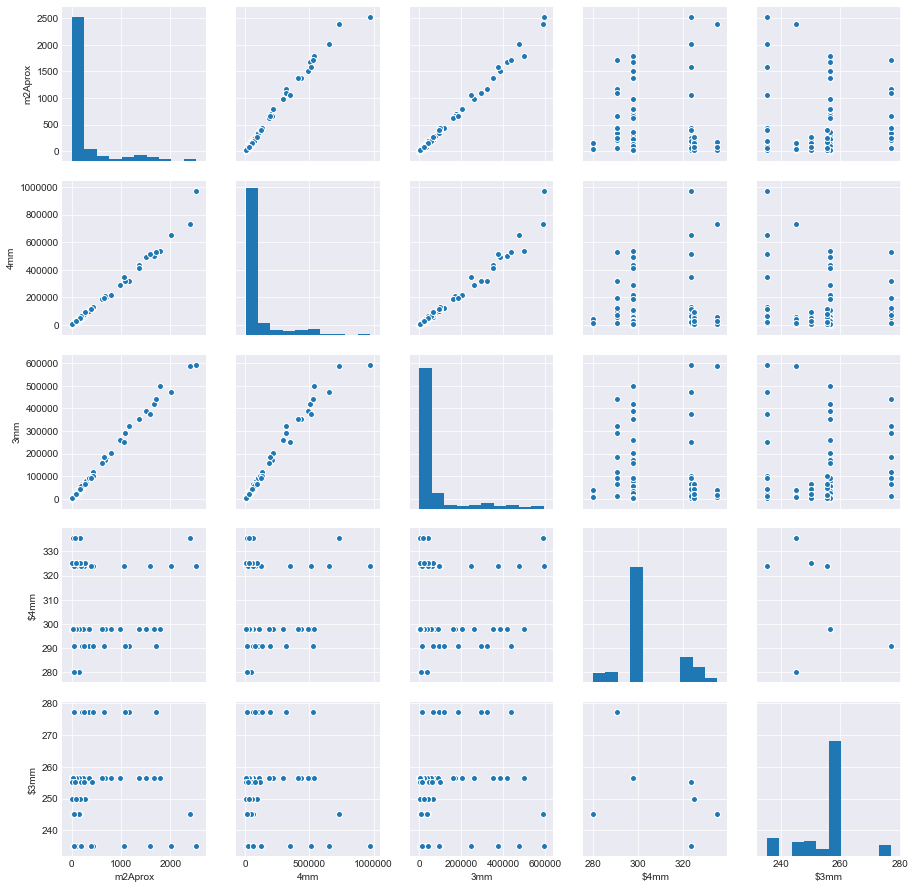

In [131]:
sns.pairplot(workTable)

In [132]:
 workTable

,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
46,joinville,58.652928,18054.000000,15045.000000,297.782896,256.508935
47,joinville,148.766748,45000.000000,38160.000000,297.782896,256.508935
48,joinville,17.855129,5000.000000,4580.000000,297.782896,256.508935
49,joinville,120.552592,35898.500000,30922.816930,297.782896,256.508935
50,joinville,14.619374,4375.000000,3750.000000,297.782896,256.508935
51,joinville,141.773388,42217.690000,36366.140620,297.782896,256.508935
52,joinville,336.284037,102480.000000,86259.860000,297.782896,256.508935
53,joinville,61.800000,17922.000000,15852.252154,297.782896,256.508935
54,joinville,358.570000,103985.300000,91976.408657,297.782896,256.508935
55,joinville,15.000000,4350.000000,3847.634018,297.782896,256.508935


In [133]:
#joinville
jllework = workTable.loc[(workTable['cidade'] == 'joinville')]
display((jllework['4mm'] / jllework['m2Aprox']).mean(),jllework['$4mm'].mean())
display((jllework['3mm'] / jllework['m2Aprox']).mean(),jllework['$3mm'].mean())
jllework.loc[jllework['cidade'] == 'joinville', 'cidade'] = 1

298.92346099870934

297.7828962797693

259.0144936807729

256.5089345364358

In [134]:
#Demais Cidades
demaiswork = workTable.loc[(workTable['cidade'] != 'joinville')]
display((demaiswork['4mm'] / demaiswork['m2Aprox']).mean(), demaiswork['$4mm'].mean())
display((demaiswork['3mm'] / demaiswork['m2Aprox']).mean(), demaiswork['$3mm'].mean())


311.7033902539182

313.1351484952484

255.13613063488984

249.84005360057273

In [135]:
 #florianopolis
florianopoliswork = workTable.loc[(workTable['cidade'] == 'florianopolis')]
display((florianopoliswork['4mm'] / florianopoliswork['m2Aprox']).mean(), florianopolis['$4mm'].mean())
display((florianopoliswork['3mm'] / florianopoliswork['m2Aprox']).mean(), florianopolis['$3mm'].mean())
florianopoliswork.loc[florianopoliswork['cidade'] == 'florianopolis', 'cidade'] = 2

335.3263888888889

335.3263888888889

245.0

245.0

In [136]:
 #Curtiba
curitibawork = workTable.loc[(workTable['cidade'] == 'curitiba')]
display((curitibawork['3mm'] / curitibawork['m2Aprox']).mean())
display((curitibawork['4mm'] / curitibawork['m2Aprox']).mean())
curitibawork.loc[curitibawork['cidade'] == 'curitiba', 'cidade'] = 3


277.13366089238883

290.81973463145647

In [137]:
 #Jaragua
jaraguawork = workTable.loc[(workTable['cidade'] == 'jaragua')]
display((jaraguawork['4mm'] / jaraguawork['m2Aprox']).mean(), jaragua['$4mm'].mean())
display((jaraguawork['3mm'] / jaraguawork['m2Aprox']).mean(), jaragua['$3mm'].mean())
jaraguawork.loc[jaraguawork['cidade'] == 'jaragua', 'cidade'] = 4

280.0

280.0

242.97323128943643

245.0

In [138]:
 #Balneario
balneariowork = workTable.loc[(workTable['cidade'] == 'balneario')]
display(((balneariowork['4mm'] / balneariowork['m2Aprox']).mean()), balneariowork['$4mm'].mean())
display(((balneariowork['3mm'] / balneariowork['m2Aprox']).mean()), balneariowork['$3mm'].mean())

display((((balneariowork['4mm'] / balneariowork['m2Aprox']).mean())+(balneariowork['$4mm'].mean()))/2)
display((((balneariowork['3mm'] / balneariowork['m2Aprox']).mean())+(balneariowork['$3mm'].mean()))/2)

balneariowork.loc[balneariowork['cidade'] == 'balneario', 'cidade'] = 5

323.75

323.75

241.31371396344727

235.0

323.75

238.15685698172365

In [139]:
 #Blumenau
blumenauwork = workTable.loc[(workTable['cidade'] == 'blumenau')]
(((blumenauwork['4mm'] / blumenauwork['m2Aprox']).mean()), blumenauwork['$4mm'].mean())
(((blumenauwork['3mm'] / blumenauwork['m2Aprox']).mean()), blumenauwork['$3mm'].mean())

print('Média $/m² 4mm: \n',((((blumenauwork['4mm'] / blumenauwork['m2Aprox']).mean())+(blumenauwork['$4mm'].mean()))/2))
print('Média $/m² 3mm: \n', (((blumenauwork['3mm'] / blumenauwork['m2Aprox']).mean())+(blumenauwork['$3mm'].mean()))/2)
blumenauwork.loc[blumenauwork['cidade'] == 'blumenau', 'cidade'] = 6

Média $/m² 4mm: 
 317.1877747272363
Média $/m² 3mm: 
 255.33333333333334


In [140]:
 #Outras/Demais cidades
outraswork = workTable.loc[
            (workTable['cidade'] != 'jaragua') 
          & (workTable['cidade'] != 'joinville')
          & (workTable['cidade'] != 'blumenau')
          & (workTable['cidade'] != 'florianopolis')
          & (workTable['cidade'] != 'balneario')
          & (workTable['cidade'] != 'curitiba')]

(((outraswork['4mm'] / outraswork['m2Aprox']).mean()), outraswork['$4mm'].mean())
(((outraswork['3mm'] / outraswork['m2Aprox']).mean()), outraswork['$3mm'].mean())

print('Média $/m² 4mm: \n',((((outraswork['4mm'] / outraswork['m2Aprox']).mean())+(outraswork['$4mm'].mean()))/2))
print('Média $/m² 3mm: \n', (((outraswork['3mm'] / outraswork['m2Aprox']).mean())+(outraswork['$3mm'].mean()))/2)


outraswork.loc[outraswork['cidade'] != 0, 'cidade'] = 7
outraswork

Média $/m² 4mm: 
 325.0
Média $/m² 3mm: 
 258.1843337353938


,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
21,7,197.190769,64087.00,59019.000000,325.0,250.0
35,7,84.461538,27450.00,21115.384615,325.0,250.0
36,7,262.000000,91700.00,65500.000000,325.0,250.0
37,7,18.748000,6093.10,4687.000000,325.0,250.0
141,7,62.307692,20250.00,18419.000000,325.0,250.0
142,7,104.000000,31200.00,26000.000000,325.0,250.0
143,7,161.538462,52500.00,43750.000000,325.0,250.0
144,7,52.627692,17104.00,13830.890000,325.0,250.0
145,7,76.153846,24750.00,20625.000000,325.0,250.0
146,7,22.523077,7320.00,6100.000000,325.0,250.0


In [141]:
 #Cidades fora de joinville
foreignerswork = workTable.loc[(workTable['cidade'] != 'joinville')]

(((foreignerswork['4mm'] / foreignerswork['m2Aprox']).mean()), foreignerswork['$4mm'].mean())
(((foreignerswork['3mm'] / foreignerswork['m2Aprox']).mean()), foreignerswork['$3mm'].mean())

print('Média $/m² 4mm: \n',((((foreignerswork['4mm'] / foreignerswork['m2Aprox']).mean())+(foreignerswork['$4mm'].mean()))/2))
print('Média $/m² 3mm: \n', (((foreignerswork['3mm'] / foreignerswork['m2Aprox']).mean())+(foreignerswork['$3mm'].mean()))/2)


foreignerswork.loc[foreignerswork['cidade'] != 0, 'cidade'] = 8
foreignerswork

Média $/m² 4mm: 
 312.41926937458334
Média $/m² 3mm: 
 252.4880921177313


,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
31,8,165.000000,57750.000000,40425.000000,335.326389,245.000000
32,8,26.839522,9000.000000,6575.682896,335.326389,245.000000
33,8,71.100000,24885.000000,17419.500000,335.326389,245.000000
34,8,2400.000000,734350.000000,588000.000000,335.326389,245.000000
22,8,1160.650000,316439.000000,321655.183515,290.819735,277.133661
23,8,1708.000000,527772.000000,439810.000000,290.819735,277.133661
24,8,662.000000,192522.664326,186600.000000,290.819735,277.133661
25,8,1086.000000,315830.231810,293220.000000,290.819735,277.133661
26,8,346.000000,100623.628182,93420.000000,290.819735,277.133661
27,8,208.000000,60490.504803,66690.000000,290.819735,277.133661


In [142]:
reg = linear_model.LinearRegression() 

In [143]:
#http://scikit-learn.org/stable/modules/linear_model.html

In [144]:
jllework.head()

,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
46,1,58.652928,18054.0,15045.00000,297.782896,256.508935
47,1,148.766748,45000.0,38160.00000,297.782896,256.508935
48,1,17.855129,5000.0,4580.00000,297.782896,256.508935
49,1,120.552592,35898.5,30922.81693,297.782896,256.508935
50,1,14.619374,4375.0,3750.00000,297.782896,256.508935


<h3>SKLEARN Linear Regr</h3>

In [145]:
import pandas as pd
from sklearn import linear_model

In [146]:
joinvilleFrame_3mm = pd.DataFrame()
florianopolisFrame_3mm = pd.DataFrame()
blumenauFrame_3mm = pd.DataFrame()
balnearioFrame_3mm = pd.DataFrame()
curitibaFrame_3mm = pd.DataFrame()
jaraguaFrame_3mm = pd.DataFrame()
outrasFrame_3mm = pd.DataFrame()
foreignersFrame_3mm = pd.DataFrame()
 

joinvilleFrame_4mm = pd.DataFrame()
florianopolisFrame_4mm = pd.DataFrame()
blumenauFrame_4mm = pd.DataFrame()
balnearioFrame_4mm = pd.DataFrame()
curitibaFrame_4mm = pd.DataFrame()
jaraguaFrame_4mm = pd.DataFrame()
outrasFrame_4mm = pd.DataFrame() 
foreignersFrame_4mm = pd.DataFrame()

In [147]:
joinvilleFrame_3mm['x'] = jllework['m2Aprox']
joinvilleFrame_3mm['y'] = jllework['3mm']

florianopolisFrame_3mm['x'] = florianopoliswork['m2Aprox']
florianopolisFrame_3mm['y'] = florianopoliswork['3mm']

blumenauFrame_3mm['x'] = blumenauwork['m2Aprox']
blumenauFrame_3mm['y'] = blumenauwork['3mm']

balnearioFrame_3mm['x'] = balneariowork['m2Aprox']
balnearioFrame_3mm['y'] = balneariowork['3mm']

curitibaFrame_3mm['x'] = curitibawork['m2Aprox']
curitibaFrame_3mm['y'] = curitibawork['3mm']

jaraguaFrame_3mm['x'] = jaraguawork['m2Aprox']
jaraguaFrame_3mm['y'] = jaraguawork['3mm']

outrasFrame_3mm['x'] = outraswork['m2Aprox']
outrasFrame_3mm['y'] = outraswork['3mm']

foreignersFrame_3mm['x'] = foreignerswork['m2Aprox']
foreignersFrame_3mm['y'] = foreignerswork['3mm']

###############################################################

joinvilleFrame_4mm['x'] = jllework['m2Aprox']
joinvilleFrame_4mm['y'] = jllework['4mm']

florianopolisFrame_4mm['x'] = florianopoliswork['m2Aprox']
florianopolisFrame_4mm['y'] = florianopoliswork['4mm']

blumenauFrame_4mm['x'] = blumenauwork['m2Aprox']
blumenauFrame_4mm['y'] = blumenauwork['4mm']

balnearioFrame_4mm['x'] = balneariowork['m2Aprox']
balnearioFrame_4mm['y'] = balneariowork['4mm']

curitibaFrame_4mm['x'] = curitibawork['m2Aprox']
curitibaFrame_4mm['y'] = curitibawork['4mm']

jaraguaFrame_4mm['x'] = jaraguawork['m2Aprox']
jaraguaFrame_4mm['y'] = jaraguawork['4mm']

outrasFrame_4mm['x'] = outraswork['m2Aprox']
outrasFrame_4mm['y'] = outraswork['4mm']

foreignersFrame_4mm['x'] = foreignerswork['m2Aprox']
foreignersFrame_4mm['y'] = foreignerswork['4mm']

In [148]:
x_values_joinville_3mm = joinvilleFrame_3mm[['x']]
y_values_joinville_3mm = joinvilleFrame_3mm[['y']]

x_values_florianopolis_3mm = florianopolisFrame_3mm[['x']]
y_values_florianopolis_3mm = florianopolisFrame_3mm[['y']]

x_values_blumenau_3mm = blumenauFrame_3mm[['x']]
y_values_blumenau_3mm = blumenauFrame_3mm[['y']]

x_values_balneario_3mm = balnearioFrame_3mm[['x']]
y_values_balneario_3mm = balnearioFrame_3mm[['y']]

x_values_curitiba_3mm = curitibaFrame_3mm[['x']]
y_values_curitiba_3mm = curitibaFrame_3mm[['y']]

x_values_jaragua_3mm = jaraguaFrame_3mm[['x']]
y_values_jaragua_3mm = jaraguaFrame_3mm[['y']]

x_values_outras_3mm = outrasFrame_3mm[['x']]
y_values_outras_3mm = outrasFrame_3mm[['y']]

x_values_foreigners_3mm = foreignersFrame_3mm[['x']]
y_values_foreigners_3mm = foreignersFrame_3mm[['y']]

#

x_values_joinville_4mm = joinvilleFrame_4mm[['x']]
y_values_joinville_4mm = joinvilleFrame_4mm[['y']]

x_values_florianopolis_4mm = florianopolisFrame_4mm[['x']]
y_values_florianopolis_4mm = florianopolisFrame_4mm[['y']]

x_values_blumenau_4mm = blumenauFrame_4mm[['x']]
y_values_blumenau_4mm = blumenauFrame_4mm[['y']]

x_values_balneario_4mm = balnearioFrame_4mm[['x']]
y_values_balneario_4mm = balnearioFrame_4mm[['y']]

x_values_curitiba_4mm = curitibaFrame_4mm[['x']]
y_values_curitiba_4mm = curitibaFrame_4mm[['y']]

x_values_jaragua_4mm = jaraguaFrame_4mm[['x']]
y_values_jaragua_4mm = jaraguaFrame_4mm[['y']]

x_values_outras_4mm = outrasFrame_4mm[['x']]
y_values_outras_4mm = outrasFrame_4mm[['y']]

x_values_foreigners_4mm = foreignersFrame_4mm[['x']]
y_values_foreigners_4mm = foreignersFrame_4mm[['y']]

In [149]:
#treinando o modelo
model = linear_model.LinearRegression()
#model.fit(x_values, y_values)


In [150]:
# Split the data into training/testing sets
values_X_train_joinville_3mm = x_values_joinville_3mm[:-40]
values_X_test_joinville_3mm = x_values_joinville_3mm[-40:]

values_X_train_florianopolis_3mm = x_values_florianopolis_3mm[:-2]
values_X_test_florianopolis_3mm = x_values_florianopolis_3mm[-2:]

values_X_train_blumenau_3mm = x_values_blumenau_3mm[:-3]
values_X_test_blumenau_3mm = x_values_blumenau_3mm[-3:]

values_X_train_balneario_3mm = x_values_balneario_3mm[:-3]
values_X_test_balneario_3mm = x_values_balneario_3mm[-3:]

values_X_train_curitiba_3mm = x_values_curitiba_3mm[:-6]
values_X_test_curitiba_3mm = x_values_curitiba_3mm[-6:]

values_X_train_jaragua_3mm = x_values_jaragua_3mm[:-6]
values_X_test_jaragua_3mm = x_values_jaragua_3mm[-3:]

values_X_train_outras_3mm = x_values_outras_3mm[:-6]
values_X_test_outras_3mm = x_values_outras_3mm[-6:]

values_X_train_foreigners_3mm = x_values_foreigners_3mm[:-25]
values_X_test_foreigners_3mm = x_values_foreigners_3mm[-25:]

#

# Split the data into training/testing sets
values_X_train_joinville_4mm = x_values_joinville_4mm[:-40]
values_X_test_joinville_4mm = x_values_joinville_4mm[-40:]

values_X_train_florianopolis_4mm = x_values_florianopolis_4mm[:-2]
values_X_test_florianopolis_4mm = x_values_florianopolis_4mm[-2:]

values_X_train_blumenau_4mm = x_values_blumenau_4mm[:-3]
values_X_test_blumenau_4mm = x_values_blumenau_4mm[-3:]

values_X_train_balneario_4mm = x_values_balneario_4mm[:-3]
values_X_test_balneario_4mm = x_values_balneario_4mm[-3:]

values_X_train_curitiba_4mm = x_values_curitiba_4mm[:-6]
values_X_test_curitiba_4mm = x_values_curitiba_4mm[-6:]

values_X_train_jaragua_4mm = x_values_jaragua_4mm[:-6]
values_X_test_jaragua_4mm = x_values_jaragua_4mm[-3:]

values_X_train_outras_4mm = x_values_outras_4mm[:-6]
values_X_test_outras_4mm = x_values_outras_4mm[-6:]

values_X_train_foreigners_4mm = x_values_foreigners_4mm[:-25]
values_X_test_foreigners_4mm = x_values_foreigners_4mm[-25:]
 

In [151]:
# Split the targets into training/testing sets

# Split the targets into training/testing sets

values_y_train_joinville_3mm = y_values_joinville_3mm[:-40]
values_y_test_joinville_3mm = y_values_joinville_3mm[-40:]

values_y_train_florianopolis_3mm = y_values_florianopolis_3mm[:-2]
values_y_test_florianopolis_3mm = y_values_florianopolis_3mm[-2:]

values_y_train_blumenau_3mm = y_values_blumenau_3mm[:-3]
values_y_test_blumenau_3mm = y_values_blumenau_3mm[-3:]

values_y_train_balneario_3mm = y_values_balneario_3mm[:-3]
values_y_test_balneario_3mm = y_values_balneario_3mm[-3:]

values_y_train_curitiba_3mm = y_values_curitiba_3mm[:-6]
values_y_test_curitiba_3mm = y_values_curitiba_3mm[-6:]

values_y_train_jaragua_3mm = y_values_jaragua_3mm[:-6]
values_y_test_jaragua_3mm = y_values_jaragua_3mm[-3:]

values_y_train_outras_3mm = y_values_outras_3mm[:-6]
values_y_test_outras_3mm = y_values_outras_3mm[-6:]

values_y_train_foreigners_3mm = y_values_foreigners_3mm[:-25]
values_y_test_foreigners_3mm = y_values_foreigners_3mm[-25:]

#
values_y_train_joinville_4mm = y_values_joinville_4mm[:-40]
values_y_test_joinville_4mm = y_values_joinville_4mm[-40:]

values_y_train_florianopolis_4mm = y_values_florianopolis_4mm[:-2]
values_y_test_florianopolis_4mm = y_values_florianopolis_4mm[-2:]

values_y_train_blumenau_4mm = y_values_blumenau_4mm[:-3]
values_y_test_blumenau_4mm = y_values_blumenau_4mm[-3:]

values_y_train_balneario_4mm = y_values_balneario_4mm[:-3]
values_y_test_balneario_4mm = y_values_balneario_4mm[-3:]

values_y_train_curitiba_4mm = y_values_curitiba_4mm[:-6]
values_y_test_curitiba_4mm = y_values_curitiba_4mm[-6:]

values_y_train_jaragua_4mm = y_values_jaragua_4mm[:-6]
values_y_test_jaragua_4mm = y_values_jaragua_4mm[-3:]

values_y_train_outras_4mm = y_values_outras_4mm[:-6]
values_y_test_outras_4mm = y_values_outras_4mm[-6:]

values_y_train_foreigners_4mm = y_values_foreigners_4mm[:-25]
values_y_test_foreigners_4mm = y_values_foreigners_4mm[-25:]




In [152]:
# Create linear regression object
regr_joinville_3mm = linear_model.LinearRegression()# Train the model using the training sets

regr_florianopolis_3mm = linear_model.LinearRegression()# Train the model using the training sets

regr_blumenau_3mm = linear_model.LinearRegression()# Train the model using the training sets

regr_balneario_3mm = linear_model.LinearRegression()# Train the model using the training sets

regr_curitiba_3mm = linear_model.LinearRegression()# Train the model using the training sets

regr_jaragua_3mm = linear_model.LinearRegression()# Train the model using the training sets

regr_outras_3mm = linear_model.LinearRegression()# Train the model using the training sets

regr_foreigners_3mm = linear_model.LinearRegression()# Train the model using the training sets
###############################################################################################

# Create linear regression object
regr_joinville_4mm = linear_model.LinearRegression()# Train the model using the training sets

regr_florianopolis_4mm = linear_model.LinearRegression()# Train the model using the training sets

regr_blumenau_4mm = linear_model.LinearRegression()# Train the model using the training sets

regr_balneario_4mm = linear_model.LinearRegression()# Train the model using the training sets

regr_curitiba_4mm = linear_model.LinearRegression()# Train the model using the training sets

regr_jaragua_4mm = linear_model.LinearRegression()# Train the model using the training sets

regr_outras_4mm = linear_model.LinearRegression()# Train the model using the training sets

regr_foreigners_4mm = linear_model.LinearRegression()# Train the model using the training sets

In [153]:
regr_joinville_3mm.fit(values_X_train_joinville_3mm, values_y_train_joinville_3mm) 

regr_florianopolis_3mm.fit(values_X_train_florianopolis_3mm, values_y_train_florianopolis_3mm) 

regr_blumenau_3mm.fit(values_X_train_blumenau_3mm, values_y_train_blumenau_3mm) 

regr_balneario_3mm.fit(values_X_train_balneario_3mm, values_y_train_balneario_3mm) 

regr_curitiba_3mm.fit(values_X_train_curitiba_3mm, values_y_train_curitiba_3mm) 

regr_jaragua_3mm.fit(values_X_train_jaragua_3mm, values_y_train_jaragua_3mm) 

regr_outras_3mm.fit(values_X_train_outras_3mm, values_y_train_outras_3mm)
regr_foreigners_3mm.fit(values_X_train_foreigners_3mm, values_y_train_foreigners_3mm)
 
####

regr_joinville_4mm.fit(values_X_train_joinville_4mm, values_y_train_joinville_4mm) 

regr_florianopolis_4mm.fit(values_X_train_florianopolis_4mm, values_y_train_florianopolis_4mm) 

regr_blumenau_4mm.fit(values_X_train_blumenau_4mm, values_y_train_blumenau_4mm) 

regr_balneario_4mm.fit(values_X_train_balneario_4mm, values_y_train_balneario_4mm) 

regr_curitiba_4mm.fit(values_X_train_curitiba_4mm, values_y_train_curitiba_4mm) 

regr_jaragua_4mm.fit(values_X_train_jaragua_4mm, values_y_train_jaragua_4mm) 

regr_outras_4mm.fit(values_X_train_outras_4mm, values_y_train_outras_4mm)
regr_foreigners_4mm.fit(values_X_train_foreigners_4mm, values_y_train_foreigners_4mm)
 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [154]:
# Make predictions using the testing set
y_pred_joinville_3mm = regr_joinville_3mm.predict(values_X_test_joinville_3mm)
y_pred_florianopolis_3mm = regr_florianopolis_3mm.predict(values_X_test_florianopolis_3mm)
y_pred_blumenau_3mm = regr_blumenau_3mm.predict(values_X_test_blumenau_3mm)
y_pred_balneario_3mm = regr_balneario_3mm.predict(values_X_test_balneario_3mm)
y_pred_curitiba_3mm = regr_curitiba_3mm.predict(values_X_test_curitiba_3mm)
y_pred_jaragua_3mm = regr_jaragua_3mm.predict(values_X_test_jaragua_3mm)
y_pred_outras_3mm = regr_outras_3mm.predict(values_X_test_outras_3mm)
y_pred_foreigners_3mm = regr_foreigners_3mm.predict(values_X_test_foreigners_3mm)

##################

# Make predictions using the testing set
y_pred_joinville_4mm = regr_joinville_4mm.predict(values_X_test_joinville_4mm)
y_pred_florianopolis_4mm = regr_florianopolis_4mm.predict(values_X_test_florianopolis_4mm)
y_pred_blumenau_4mm = regr_blumenau_4mm.predict(values_X_test_blumenau_4mm)
y_pred_balneario_4mm = regr_balneario_4mm.predict(values_X_test_balneario_4mm)
y_pred_curitiba_4mm = regr_curitiba_4mm.predict(values_X_test_curitiba_4mm)
y_pred_jaragua_4mm = regr_jaragua_4mm.predict(values_X_test_jaragua_4mm)
y_pred_outras_4mm = regr_outras_4mm.predict(values_X_test_outras_4mm)
y_pred_foreigners_4mm = regr_foreigners_4mm.predict(values_X_test_foreigners_4mm)

JOINVILLE 3MM
Coefficients: 
 [[253.25487195]]
Mean squared error: 61245905.94
Variance score: 1.00


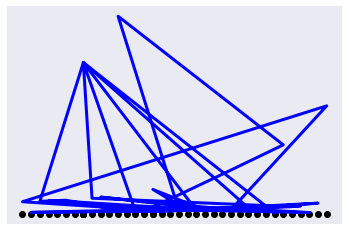

JOINVILLE 4MM
Coefficients: 
 [[305.26027083]]
Mean squared error: 21361291.78
Variance score: 1.00


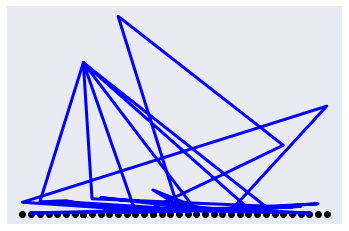

In [184]:
print('JOINVILLE 3MM')
# The coefficients
print('Coefficients: \n', regr_joinville_3mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_joinville_3mm, y_pred_joinville_3mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_joinville_3mm, y_pred_joinville_3mm))

# Plot outputs
plt.scatter(values_X_test_joinville_3mm, values_y_test_joinville_3mm,  color='black')
plt.plot(values_X_test_joinville_3mm, y_pred_joinville_3mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

print('JOINVILLE 4MM')
# The coefficients
print('Coefficients: \n', regr_joinville_4mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_joinville_4mm, y_pred_joinville_4mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_joinville_4mm, y_pred_joinville_4mm))

# Plot outputs
plt.scatter(values_X_test_joinville_4mm, values_y_test_joinville_4mm,  color='black')
plt.plot(values_X_test_joinville_4mm, y_pred_joinville_4mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

FLORIANOPOLIS 3MM
Coefficients: 
 [[245.]]
Mean squared error: 0.00
Variance score: 1.00


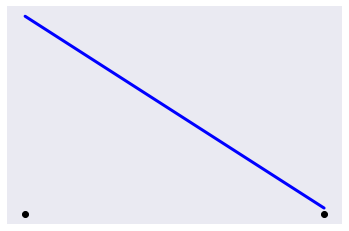

FLORIANOPOLIS 4MM
Coefficients: 
 [[352.85054535]]
Mean squared error: 6274384555.45
Variance score: 0.95


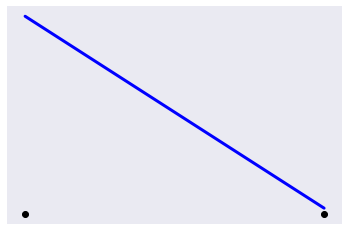

In [156]:
print('FLORIANOPOLIS 3MM')
# The coefficients
print('Coefficients: \n', regr_florianopolis_3mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_florianopolis_3mm, y_pred_florianopolis_3mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_florianopolis_3mm, y_pred_florianopolis_3mm))

# Plot outputs
plt.scatter(values_X_test_florianopolis_3mm, values_y_test_florianopolis_3mm,  color='black')
plt.plot(values_X_test_florianopolis_3mm, y_pred_florianopolis_3mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

print('FLORIANOPOLIS 4MM')
# The coefficients
print('Coefficients: \n', regr_florianopolis_4mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_florianopolis_4mm, y_pred_florianopolis_4mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_florianopolis_4mm, y_pred_florianopolis_4mm))

# Plot outputs
plt.scatter(values_X_test_florianopolis_4mm, values_y_test_florianopolis_4mm,  color='black')
plt.plot(values_X_test_florianopolis_4mm, y_pred_florianopolis_4mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

BALNEARIO 3MM
Coefficients: 
 [[234.78818618]]
Mean squared error: 61401.39
Variance score: 1.00


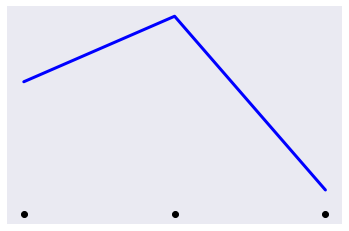

BALNEARIO 4MM
Coefficients: 
 [[363.72609406]]
Mean squared error: 1399109868.02
Variance score: 0.96


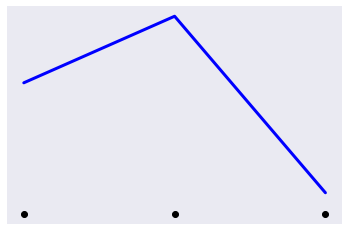

In [157]:
print('BALNEARIO 3MM')
# The coefficients
print('Coefficients: \n', regr_balneario_3mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_balneario_3mm, y_pred_balneario_3mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_balneario_3mm, y_pred_balneario_3mm))

# Plot outputs
plt.scatter(values_X_test_balneario_3mm, values_y_test_balneario_3mm,  color='black')
plt.plot(values_X_test_balneario_3mm, y_pred_balneario_3mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


print('BALNEARIO 4MM')
# The coefficients
print('Coefficients: \n', regr_balneario_4mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_balneario_4mm, y_pred_balneario_4mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_balneario_4mm, y_pred_balneario_4mm))

# Plot outputs
plt.scatter(values_X_test_balneario_4mm, values_y_test_balneario_4mm,  color='black')
plt.plot(values_X_test_balneario_4mm, y_pred_balneario_4mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

BLUMENAU 3MM
Coefficients: 
 [[245.33416004]]
Mean squared error: 5366773.44
Variance score: 0.99


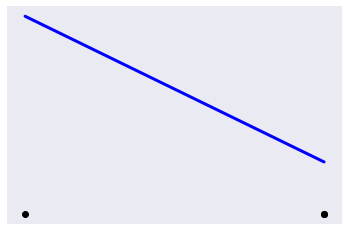

BLUMENAU 4MM
Coefficients: 
 [[277.86094469]]
Mean squared error: 28656964.83
Variance score: 0.96


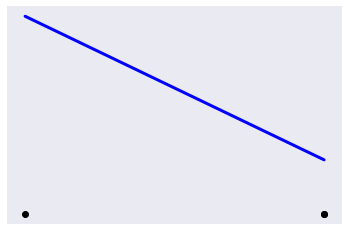

In [158]:
print('BLUMENAU 3MM')
# The coefficients
print('Coefficients: \n', regr_blumenau_3mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_blumenau_3mm, y_pred_blumenau_3mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_blumenau_3mm, y_pred_blumenau_3mm))

# Plot outputs
plt.scatter(values_X_test_blumenau_3mm, values_y_test_blumenau_3mm,  color='black')
plt.plot(values_X_test_blumenau_3mm, y_pred_blumenau_3mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

print('BLUMENAU 4MM')
# The coefficients
print('Coefficients: \n', regr_blumenau_4mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_blumenau_4mm, y_pred_blumenau_4mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_blumenau_4mm, y_pred_blumenau_4mm))

# Plot outputs
plt.scatter(values_X_test_blumenau_4mm, values_y_test_blumenau_4mm,  color='black')
plt.plot(values_X_test_blumenau_4mm, y_pred_blumenau_4mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

CURITIBA 3MM
Coefficients: 
 [[241.64921425]]
Mean squared error: 430604870.70
Variance score: 0.94


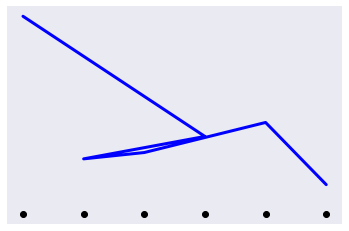

CURITIBA 4MM
Coefficients: 
 [[321.57069905]]
Mean squared error: 533573034.06
Variance score: 0.94


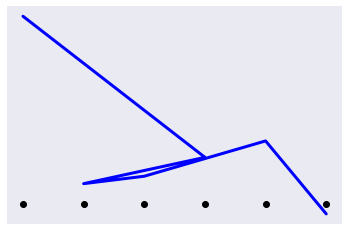

In [159]:
print('CURITIBA 3MM')
# The coefficients
print('Coefficients: \n', regr_curitiba_3mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_curitiba_3mm, y_pred_curitiba_3mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_curitiba_3mm, y_pred_curitiba_3mm))

# Plot outputs
plt.scatter(values_X_test_curitiba_3mm, values_y_test_curitiba_3mm,  color='black')
plt.plot(values_X_test_curitiba_3mm, y_pred_curitiba_3mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

print('CURITIBA 4MM')
# The coefficients
print('Coefficients: \n', regr_curitiba_4mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_curitiba_4mm, y_pred_curitiba_4mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_curitiba_4mm, y_pred_curitiba_4mm))

# Plot outputs
plt.scatter(values_X_test_curitiba_4mm, values_y_test_curitiba_4mm,  color='black')
plt.plot(values_X_test_curitiba_4mm, y_pred_curitiba_4mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

JARAGUA 3MM
Coefficients: 
 [[190.64809675]]
Mean squared error: 21267612.54
Variance score: 0.87


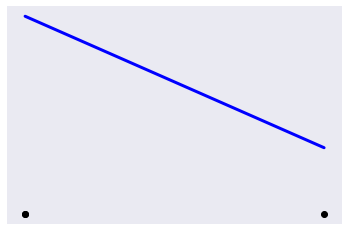

JARAGUA 4MM
Coefficients: 
 [[280.]]
Mean squared error: 0.00
Variance score: 1.00


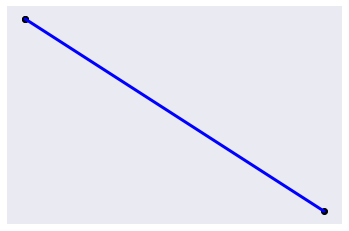

In [160]:
print('JARAGUA 3MM')
# The coefficients
print('Coefficients: \n', regr_jaragua_3mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_jaragua_3mm, y_pred_jaragua_3mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_jaragua_3mm, y_pred_jaragua_3mm))

# Plot outputs
plt.scatter(values_X_test_jaragua_3mm, values_y_test_jaragua_3mm,  color='black')
plt.plot(values_X_test_jaragua_3mm, y_pred_jaragua_3mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

print('JARAGUA 4MM')
# The coefficients
print('Coefficients: \n', regr_jaragua_4mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_jaragua_4mm, y_pred_jaragua_4mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_jaragua_4mm, y_pred_jaragua_4mm))

# Plot outputs
plt.scatter(values_X_test_jaragua_4mm, values_y_test_jaragua_4mm,  color='black')
plt.plot(values_X_test_jaragua_4mm, y_pred_jaragua_4mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

OUTRAS CIDADES 3MM
Coefficients: 
 [[264.36802355]]
Mean squared error: 143240.17
Variance score: 1.00


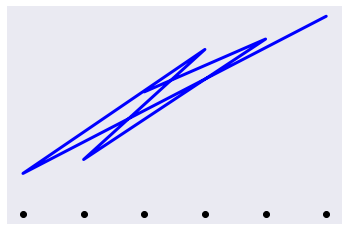

OUTRAS CIDADES 3MM
Coefficients: 
 [[347.15128715]]
Mean squared error: 1453007.75
Variance score: 0.98


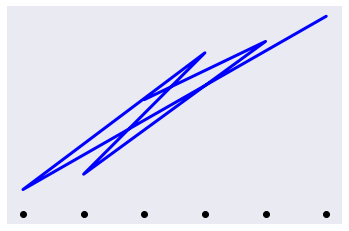

In [161]:
print('OUTRAS CIDADES 3MM')
# The coefficients
print('Coefficients: \n', regr_outras_3mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_outras_3mm, y_pred_outras_3mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_outras_3mm, y_pred_outras_3mm))

# Plot outputs
plt.scatter(values_X_test_outras_3mm, values_y_test_outras_3mm,  color='black')
plt.plot(values_X_test_outras_3mm, y_pred_outras_3mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

print('OUTRAS CIDADES 3MM')
# The coefficients
print('Coefficients: \n', regr_outras_4mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_outras_4mm, y_pred_outras_4mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_outras_4mm, y_pred_outras_4mm))

# Plot outputs
plt.scatter(values_X_test_outras_4mm, values_y_test_outras_4mm,  color='black')
plt.plot(values_X_test_outras_4mm, y_pred_outras_4mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

FORA DE JOINVILLE 3MM
Coefficients: 
 [[246.18382577]]
Mean squared error: 66870797.53
Variance score: 1.00


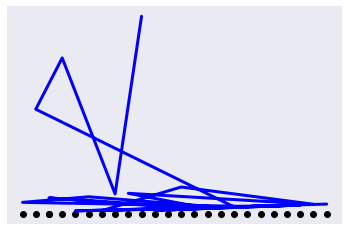

FORA DE JOINVILLE 4MM
Coefficients: 
 [[334.71687837]]
Mean squared error: 54697941.72
Variance score: 1.00


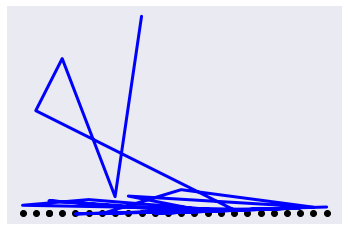

In [162]:
print('FORA DE JOINVILLE 3MM')
# The coefficients
print('Coefficients: \n', regr_foreigners_3mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_foreigners_3mm, y_pred_foreigners_3mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_foreigners_3mm, y_pred_foreigners_3mm))

# Plot outputs
plt.scatter(values_X_test_foreigners_3mm, values_y_test_foreigners_3mm,  color='black')
plt.plot(values_X_test_foreigners_3mm, y_pred_foreigners_3mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

print('FORA DE JOINVILLE 4MM')
# The coefficients
print('Coefficients: \n', regr_foreigners_4mm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(values_y_test_foreigners_4mm, y_pred_foreigners_4mm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(values_y_test_foreigners_4mm, y_pred_foreigners_4mm))

# Plot outputs
plt.scatter(values_X_test_foreigners_4mm, values_y_test_foreigners_4mm,  color='black')
plt.plot(values_X_test_foreigners_4mm, y_pred_foreigners_4mm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

<h3>Linear</h3>

In [163]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

(63, 6) (63,)


1.0

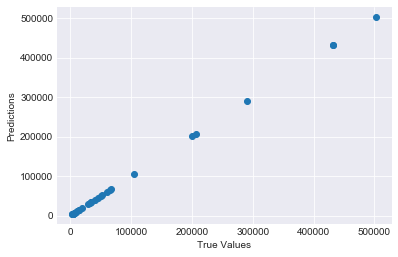

In [181]:
df_joinville = jllework
y = df_joinville['4mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_joinville, y, test_size=0.33)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)

(66, 6) (66,)


1.0

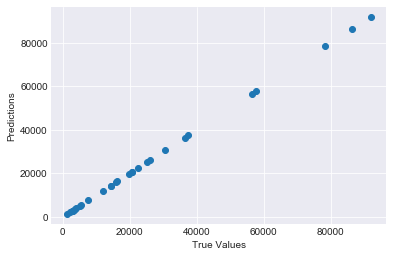

In [165]:
df_joinville = jllework
y = df_joinville['3mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_joinville, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)

(2, 6) (2,)


0.990044596577961

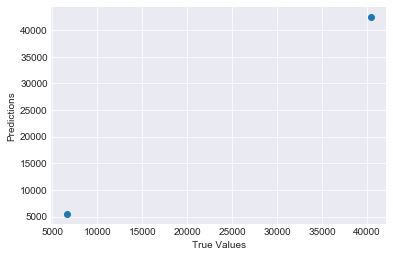

In [166]:
df_florianopolis = florianopoliswork
y = df_florianopolis['3mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_florianopolis, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)

(2, 6) (2,)


0.9863744689537346

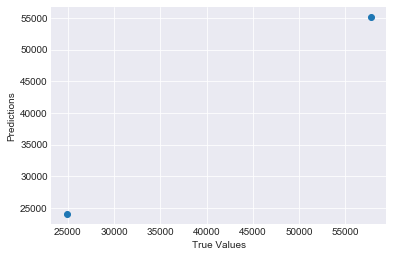

In [167]:
df_florianopolis = florianopoliswork
y = df_florianopolis['4mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_florianopolis, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)

(4, 6) (4,)


1.0

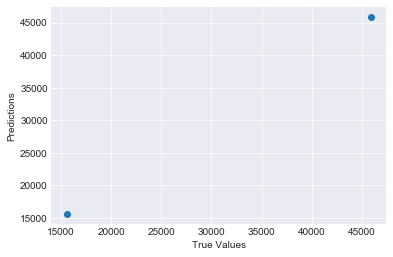

In [168]:
df_blumenau = blumenauwork
y = df_blumenau['3mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_blumenau, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)

(4, 6) (4,)


1.0

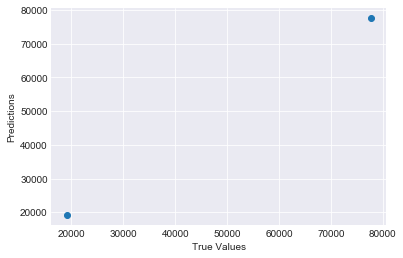

In [169]:
df_blumenau = blumenauwork
y = df_blumenau['4mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_blumenau, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)

(6, 6) (6,)


1.0

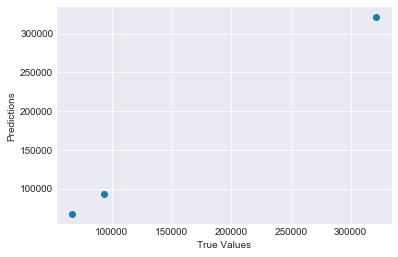

In [170]:
df_curitiba = curitibawork
y = df_curitiba['3mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_curitiba, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)

(6, 6) (6,)


1.0

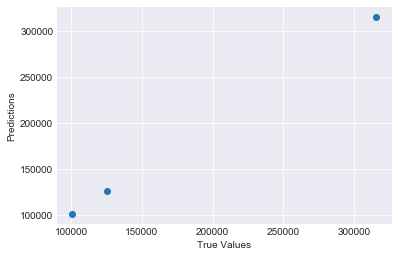

In [171]:
df_curitiba = curitibawork
y = df_curitiba['4mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_curitiba, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)

(10, 6) (10,)


1.0

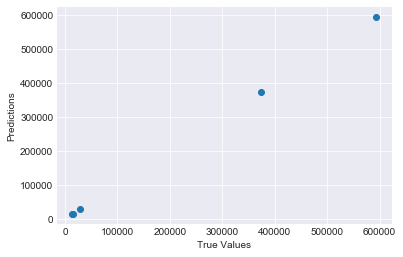

In [172]:
df_balneario = balneariowork
y = df_balneario['3mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_balneario, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)

(10, 6) (10,)


1.0

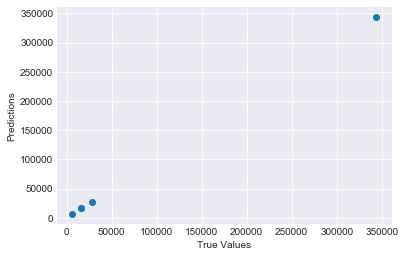

In [173]:
df_balneario = balneariowork
y = df_balneario['4mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_balneario, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)

(5, 6) (5,)


1.0

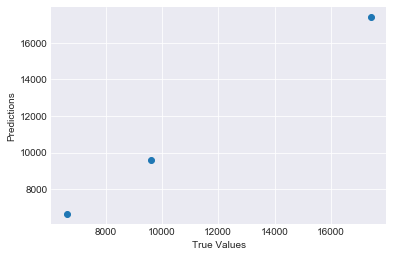

In [174]:
df_jaragua = jaraguawork
y = df_jaragua['3mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_jaragua, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)

(5, 6) (5,)


1.0

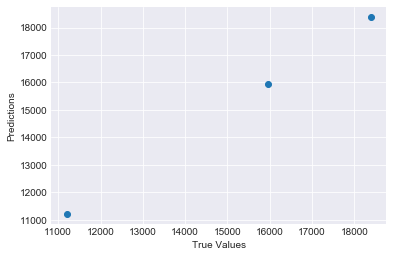

In [175]:
df_jaragua = jaraguawork
y = df_jaragua['4mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_jaragua, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)

(9, 6) (9,)


1.0

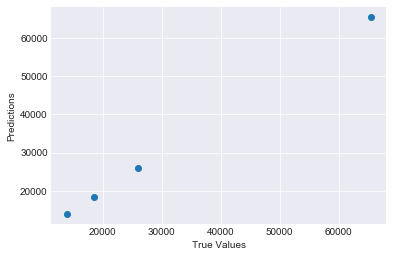

In [176]:
df_outraswork = outraswork
y = df_outraswork['3mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_outraswork, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)

(9, 6) (9,)


1.0

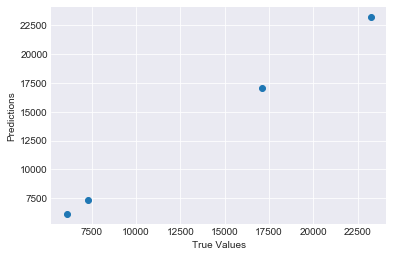

In [177]:
df_outraswork = outraswork
y = df_outraswork['4mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_outraswork, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)

(38, 6) (38,)


1.0

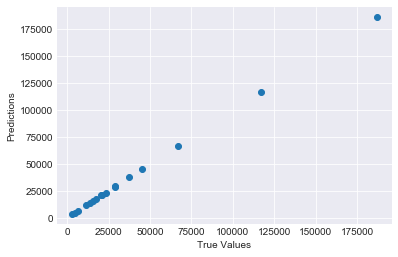

In [178]:
#Cidades que não são JOINVILLE

df_foreignerswork = foreignerswork
y = df_foreignerswork['3mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_foreignerswork, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)

(38, 6) (38,)


1.0

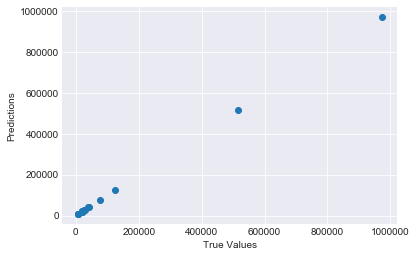

In [179]:
#Cidades que não são JOINVILLE

df_foreignerswork = foreignerswork
y = df_foreignerswork['4mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_foreignerswork, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

model.score(X_test, y_test)